In [1]:
from client import start_client
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.pyplot import figure
from main_func import main,real_partial
from jupyterthemes import jtplot

client,w=start_client(5)
client

<Client: 'tcp://127.0.0.1:44075' processes=5 threads=5, memory=33.69 GB>


Client Scheduler: tcp://127.0.0.1:44075 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 5 Cores: 5 Memory: 33.69 GB


### Main function
- make_classification parameters: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html?highlight=make_classification#sklearn.datasets.make_classification
- choose e, and chunk size
- run multiple times to produce plots


### Initialize
***

In [2]:
jtplot.style(theme='grade3') #light plot theme

batches=30000 #number of minibatches
batch_size=1 #size of each minibatch
e=0.01 #tolerance for φ(χ)

#compute samples size
training_s=batches*batch_size
n_samples=int(3*training_s/2) # 1/3 of the samples will be used for testing

#parameters for make classification
dataset_params={
    "n_samples":n_samples,
    "n_features":1000,
    "n_informative":2,
    "n_redundant":0,
    "n_repeated":0,
    "n_classes":2,
    "n_clusters_per_class":1,
    "flip_y":0,
    "weights":[0.5,0.5],
    "random_state":17
}
new="yes" #choose if you want to recreate the dataset

### Dataset with no noise y=0
***
#### Balanced
- weights=[0.5,0,5]

In [ ]:
# 3 different e
new="yes"
dataset_params["weights"]=[0.5,0.5]
Bal_acc_e=[]
Bal_rounds_e=[]
bal_e_time=[]
for i in [0.01,0.05,0.1]:
    e=i
    start_time = time.time()
    E_array,feature_array,Acc,Rounds,Subs=main(client,w,new,dataset_params,500,e)
    end_time = time.time()
    new="no"
    bal_e_time.append(end_time-start_time)
    Bal_acc_e.append(Acc)
    Bal_rounds_e.append(Rounds)
# 3 different bach_sizes
Bal_acc_b=[]
Bal_rounds_b=[]
bal_b_time=[]
for i in [1000,500,150]:
    e=0.01
    batches=i
    start_time = time.time()
    E_array,feature_array,Acc,Rounds,Subs=main(client,w,new,dataset_params,batches,e)
    end_time = time.time()
    bal_b_time.append(end_time-start_time)
    Bal_acc_b.append(Acc)
    Bal_rounds_b.append(Rounds)
    

A new dataset has been created...
coo ([array([ 8.19098293e+01, -5.39423625e+01, -5.94633734e+01,  4.61966053e+00,
       -3.16306636e+01,  1.41500978e+01,  1.71063975e+02, -1.13800372e+02,
       -5.45998188e+01,  2.18317835e+01,  8.92308041e+01, -3.07614162e+01,
        5.69225104e+01,  1.24027548e+01,  1.11310812e+02,  1.45627598e+02,
       -5.93108870e+00, -8.67045004e+01, -4.11354510e+01, -6.02516977e+01,
        6.21800516e+01, -3.56228481e+00, -1.15574479e+01,  1.93841671e+00,
        9.95827837e+01,  1.64796091e+01, -7.41935442e+01, -1.08825097e+02,
        9.13621733e+01,  1.90895903e+01,  1.09892236e+02,  3.26834915e+01,
       -5.09231568e+01,  1.15979379e+02, -4.63445544e+01,  6.32368690e+00,
        1.72813772e+01,  2.57946933e+01,  9.79031625e+01, -1.09284467e+02,
        1.54666936e+01, -1.90120440e+02, -2.31875305e+01,  9.45641382e+01,
        6.93824750e+01,  1.02036529e+02, -1.40860992e+02,  1.69775526e+01,
       -4.65388741e+01,  1.04900822e+02, -1.12089182e+02,  2

coo ([array([ 7.90698353e+01, -1.20356603e+01, -6.70559628e+01, -1.11939736e+01,
       -4.10032788e+01, -6.12526917e+01,  1.70821948e+02, -1.19524698e+02,
        7.70608202e+00, -3.65089982e+01,  1.57752182e+02, -1.07371161e+01,
        1.15465905e+01,  2.71952226e+00,  9.88192212e+01,  1.50087450e+02,
        9.80295270e+01, -5.66413860e+01, -4.54495313e+01, -1.12239141e+02,
        1.01017031e+02, -1.47434270e+00, -9.92586853e+01, -1.95654921e+01,
        7.22006808e+01,  1.71019521e+00, -8.43929627e+01, -1.65670609e+02,
        1.61144100e+01,  8.71910443e+01,  1.01981382e+02,  7.00014145e+01,
       -7.15752999e+00,  9.52413045e+01, -2.45232490e+01, -1.22603202e+01,
       -7.73161104e+00, -2.82681509e+01,  7.36689469e+01, -5.80194917e+01,
       -1.90339934e+01, -1.78551247e+02, -8.14828546e+01,  9.14775568e+01,
        8.79942826e+01,  2.10845126e+02, -1.69117735e+02, -4.50276586e+01,
       -7.89783298e+01,  6.88144942e+01, -4.23312513e+01,  1.94623693e+01,
       -1.16347747e

coo ([array([ 2.15440034e+01, -2.47744752e+01, -7.05285149e+01, -1.24522939e+01,
       -2.64637861e+01, -7.46061367e+01,  1.21228353e+02, -1.65998233e+02,
       -1.70874151e+01, -7.23636050e+01,  1.76260830e+02,  6.89007670e+00,
       -7.64116148e+00,  1.04053110e+01,  1.69498263e+02,  1.25495363e+02,
        9.11945290e+01, -9.21781232e+01, -7.59082276e+01, -1.24712752e+02,
        8.02342774e+01, -4.26569469e+00, -6.20968549e+01, -4.08434025e+01,
        1.03722837e+02,  3.83066687e+01, -8.37380635e+01, -1.70822509e+02,
        2.41773713e+01,  1.08055432e+02,  1.00081489e+02,  1.05756807e+01,
        1.51306537e+01,  4.49841415e+01,  1.83106304e+01,  1.33938609e+01,
       -1.80244973e+01, -1.59200618e+01,  7.09765662e+01, -3.39322534e+01,
       -5.17364135e+01, -1.87649953e+02, -6.98411588e+01,  8.77612609e+01,
        8.58705879e+01,  1.80958183e+02, -1.75748111e+02, -1.41054243e+01,
       -7.67487800e+01,  2.60282218e+01, -5.27860636e+01,  2.55407902e+01,
       -9.93448950e

coo ([array([ 1.07436239e+01,  2.45721208e+01, -8.63786885e+01, -2.07026605e+00,
       -7.90692860e-01, -6.17273895e+01,  4.29993586e+01, -1.64627572e+02,
        1.50973923e+00, -3.12028694e+01,  1.92704729e+02, -6.70632913e+01,
        2.19676691e+00, -2.80819809e+01,  2.12352499e+02,  1.70393267e+02,
        9.07586915e+01, -1.30068516e+02, -4.33414953e+01, -1.22281650e+02,
        8.82426229e+01,  6.34851299e+01, -3.26363070e+01, -4.18205095e+01,
        8.59382346e+01,  2.94353654e+01, -9.26436448e+01, -1.67704493e+02,
        4.32019214e+01,  8.66869354e+01,  1.37842369e+02,  4.64730443e+00,
       -1.13188420e+01,  8.98854507e+01,  9.20565043e-01,  1.56638499e+01,
        9.77052979e+00,  1.30801432e+01,  5.15427963e+01, -3.99473202e+01,
       -4.31163646e+01, -1.75690318e+02, -8.05597938e+01,  5.62340611e+01,
        1.20447504e+02,  1.90106803e+02, -2.21578308e+02, -3.68660480e+00,
       -7.89114712e+01,  3.96620066e+01, -6.24839629e+01,  6.75073459e+01,
       -1.37529213e

coo ([array([ 2.57937585e+00,  2.27728089e+01, -8.94201135e+01, -5.62681465e+01,
       -1.10146264e+02, -8.29246595e+01,  5.27960182e+00, -1.92540011e+02,
       -2.17924140e+01, -2.79716377e+01,  2.27056442e+02, -6.67084361e+01,
        2.33591677e+01, -2.03684100e+01,  2.13765583e+02,  1.74834196e+02,
        8.58559650e+01, -1.02709984e+02, -6.63129979e+01, -1.57327354e+02,
        8.96890294e+01,  7.87676394e+01, -6.36029789e+01,  4.88157647e+00,
        1.33856367e+02, -3.18364792e+00, -1.00472720e+02, -1.45140092e+02,
        1.04755950e+02,  1.04900387e+02,  1.30434314e+02,  1.13696959e+01,
       -7.94215532e+00,  2.90160795e+01,  2.16783951e+01,  2.33158077e+01,
        2.27356483e+01, -3.17555354e+01,  4.11644501e+01, -1.93463590e+01,
       -2.93364149e+01, -1.51534257e+02, -5.26198132e+01,  2.31370771e+01,
        6.65095957e+01,  1.09145964e+02, -2.18563440e+02,  3.63423065e+01,
       -8.04881441e+01,  5.31204996e+01, -4.88305091e+01,  4.55918831e+01,
       -1.32418700e

coo ([array([ 4.22985202e+01, -1.81227815e+01, -9.78797548e+01, -3.18782880e+01,
       -4.24241426e+01, -1.42538414e+01,  3.41326387e+00, -1.64780945e+02,
       -6.08447086e+00,  5.84284605e-01,  2.14971843e+02, -5.97655172e+01,
        1.99099823e+01, -3.52352350e+01,  1.46410265e+02,  1.38987754e+02,
        8.91706202e+01, -8.02050097e+01, -8.56361406e+01, -1.81822531e+02,
        6.44888585e+01,  3.96383935e+01, -6.85319650e+01,  2.25406691e+01,
        1.14343403e+02, -7.82253625e+00, -1.21113462e+02, -1.53092541e+02,
        1.19480426e+02,  8.17192947e+01,  1.13075505e+02,  3.87499750e+00,
       -5.18210484e+01,  3.07456416e+01,  2.63400932e+01,  4.56107035e+01,
        5.27677222e+01, -6.41269189e+01, -6.95096281e+00, -7.66195902e+01,
       -4.62709469e+01, -1.70869258e+02, -5.37494563e+01,  2.79497421e+01,
        8.04110775e+01,  9.06891247e+01, -2.21077756e+02,  9.99657532e+00,
       -8.67856054e+01,  3.42999638e+01, -3.77438359e+01,  5.32512104e+01,
       -5.58982636e

coo ([array([ 3.42270337e+01, -8.38328204e+01, -9.21056766e+01,  2.26377547e+01,
       -1.18453748e+01, -4.82386717e+01, -2.43739202e+01, -2.21216017e+02,
       -1.72470751e+01,  3.54882361e+01,  1.95979806e+02, -4.94263224e+01,
        4.81900441e+01, -6.19947368e+01,  1.40052026e+02,  1.35870765e+02,
        4.52449357e+01, -5.64757769e+01, -7.91268760e+01, -1.77066205e+02,
        3.49489179e+01,  4.41480534e+01, -3.03120927e+01, -2.27438072e+00,
        1.22977540e+02,  2.58682524e+01, -1.07628705e+02, -1.20006829e+02,
        1.37532983e+02,  5.83544910e+01,  8.53002160e+01,  1.34816013e+01,
       -4.44548275e+01, -1.00277085e-01,  3.48643667e+01,  5.45164428e+01,
        3.40270106e+01, -5.24832268e+01, -2.73270083e+01, -8.58784812e+01,
       -5.27422093e+01, -1.85404847e+02, -5.78551084e+01,  7.97832451e+01,
        5.89191119e+01,  1.14833532e+02, -1.65876087e+02, -7.04207624e+01,
       -1.02675174e+02,  6.68183514e+01, -5.25739607e+01,  4.91765927e+01,
       -5.72216388e

coo ([array([-7.12454686e+00, -5.78008913e+01, -8.94968405e+01,  5.64186897e+00,
       -1.74460645e+01, -3.86885780e+01, -1.16052093e+01, -1.98017458e+02,
       -4.13309973e+01,  1.15782469e+01,  1.68705603e+02, -4.71029392e+01,
        2.56671750e+01, -1.12075619e+02,  9.38650561e+01,  1.44622594e+02,
        5.52414576e+01, -7.58909518e+01, -5.39593935e+01, -1.61116958e+02,
        4.10652482e+00,  2.84431089e+01, -4.44248559e+01, -1.91223318e+01,
        1.29980028e+02, -3.58077352e+01, -1.24386446e+02, -8.41523420e+01,
        1.21912958e+02,  4.42743560e+01,  6.68243587e+01, -1.22300221e+01,
       -8.67201683e+01,  1.48760594e+01,  1.45128957e+01,  3.15914625e+01,
        8.23968824e-01, -3.40706015e+01, -3.36635462e+01, -6.58842744e+01,
       -6.11727945e+01, -1.60308724e+02, -4.55101479e+01,  7.66674794e+01,
        7.77630334e+01,  1.40903199e+02, -1.35138477e+02, -4.45393612e+01,
       -5.52278226e+01,  1.01745023e+02, -7.11783939e+01,  1.50633433e+01,
       -9.20603440e

coo ([array([-4.82769447e+01, -1.20711282e+01, -1.21963812e+02, -2.18733552e+01,
        2.33301031e+01, -3.83283239e+01, -1.50839639e+01, -2.02165681e+02,
        3.78121988e+01,  3.14227057e+01,  1.69119323e+02,  3.82315313e-01,
        9.16975240e+01, -8.69732553e+01,  5.73657892e+01,  1.44514432e+02,
        3.84961644e+01, -5.92751678e+01, -4.10143804e+01, -1.91701204e+02,
       -5.55773197e+01,  8.69476726e+01, -4.70744883e+01, -5.16903764e+00,
        2.10488633e+02, -2.69776964e+01, -1.42254999e+02, -9.17372993e+01,
        1.19544807e+02,  2.87086432e+01,  3.22744185e+01,  2.31439833e+01,
       -6.99108774e+01,  2.49169428e+01,  2.21506261e+00,  5.89712834e+01,
        3.55170260e+00, -4.51996943e+01, -1.40665498e+01, -3.86467908e+01,
       -6.81448430e+01, -1.34858226e+02, -3.12315448e+01,  4.06666537e+01,
        9.98306648e+01,  1.11001407e+02, -9.52951139e+01, -5.03338915e+01,
       -8.75267863e+01,  8.94951149e+01, -5.48551893e+01, -6.13767004e+00,
       -6.84697039e

coo ([array([-6.67012480e+01, -6.78841150e+00, -8.21506340e+01, -2.58834625e+01,
       -7.97512020e+00, -6.83149766e+01, -2.64765943e+01, -1.79993260e+02,
        6.75977306e+01,  1.85110898e+01,  1.68721791e+02,  5.86436796e+01,
        1.07104116e+02, -8.66621169e+01,  2.25365601e+01,  1.31186104e+02,
        5.71868821e+01, -2.70876305e+01, -1.95151527e+01, -1.73120263e+02,
       -3.64578931e+01,  8.15066893e+01, -3.64440511e+01, -5.98676469e+01,
        1.87863115e+02, -7.59096344e+00, -1.15820999e+02, -8.82795973e+01,
        1.01692221e+02,  5.05319106e+01,  8.87791262e+01,  1.42900899e+01,
       -7.14912473e+01,  2.73117398e+01,  1.13251181e+01,  7.26977561e+01,
       -1.39477926e+01, -3.24114690e+01,  4.37770849e+01, -1.77141291e+01,
       -6.33324117e+01, -1.37287892e+02, -8.98244318e+00,  4.20714353e+01,
        8.87163748e+01,  1.46185499e+02, -1.04784715e+02, -5.06078227e+01,
       -8.59929577e+01,  7.68446003e+01, -7.18133676e+01, -1.36436678e+01,
       -1.66554104e

coo ([array([-7.56971420e+01, -1.06236654e+01, -1.20867405e+02, -2.55185553e+01,
        1.99693649e+01, -4.40800096e+01, -5.19094312e+01, -1.87922697e+02,
        1.09420253e+02,  3.98776343e+00,  1.78726511e+02,  2.66131916e+00,
        1.07097210e+02, -1.35510629e+02,  4.46358654e+01,  1.01557988e+02,
        7.06365783e+01, -1.81539609e+01, -8.59625343e+01, -1.19437155e+02,
       -1.28673188e+01,  1.04494481e+02, -5.49848186e+01, -8.76656892e+01,
        1.52230727e+02, -2.13871602e+01, -1.09859781e+02, -5.60651841e+01,
        1.40330344e+02,  1.22022973e+01,  9.07163217e+01, -2.08757626e+00,
       -3.80419267e+01,  2.34681350e+01, -2.89871383e+01,  8.72710685e+01,
       -4.22946360e+01, -2.02634830e+01,  4.89602053e+01, -8.45870011e+01,
       -7.01023699e+01, -1.97672537e+02, -3.90892147e+01,  1.88060065e+01,
        1.15283396e+02,  1.46395910e+02, -1.01717612e+02, -9.04278005e+01,
       -5.09080108e+01,  6.00845550e+01, -3.67084640e+01, -4.58179599e+01,
       -6.20475645e

coo ([array([-4.15722714e+01, -2.69364408e+01, -8.68680304e+01,  1.07127259e+01,
        3.78784368e+01, -5.60382938e+01, -2.44463844e+01, -1.90789819e+02,
        1.27837619e+02, -1.42330957e+01,  1.40645816e+02, -4.31025231e+00,
        9.35380372e+01, -1.02246610e+02,  4.93420066e+01,  9.64723897e+01,
        4.53651460e+01,  2.30781604e+01, -8.73106236e+01, -1.32467497e+02,
        1.67878251e+01,  7.50842737e+01, -9.62085725e+01, -9.17323564e+01,
        1.30146860e+02, -2.48842257e+01, -5.94434083e+01, -6.33471920e+01,
        7.83931066e+01, -2.25393884e+00,  7.69140947e+01, -5.60748473e+01,
       -5.74649608e+01,  7.05891512e+01, -2.13837481e+01,  3.40346314e+01,
       -3.47651538e+01, -2.48401231e+01,  4.30213011e+01, -8.14064669e+01,
       -6.38619363e+01, -2.20066777e+02, -4.92258057e+01,  3.38943193e+01,
        8.96468183e+01,  1.47900404e+02, -8.00354089e+01, -6.62503370e+01,
       -3.55616895e+01,  7.52070242e+01, -6.82302581e+01, -4.80841855e+01,
       -7.02661417e

coo ([array([-4.98533185e+01, -3.59407775e+00, -8.31020255e+01,  1.88362336e+01,
        5.57382708e+01, -3.10706997e+01, -2.97161273e+01, -2.20768150e+02,
        1.47952694e+02,  1.46593381e-01,  1.41934285e+02, -4.13645086e+01,
        8.08999129e+01, -1.18606013e+02,  7.06398078e+01,  9.91195311e+01,
        5.79785729e+01,  6.66870871e+00, -7.09374391e+01, -1.40973556e+02,
        2.59885696e+01,  6.92796387e+01, -7.97123349e+01, -4.04976006e+01,
        1.44731744e+02, -4.74522240e+01, -2.30537499e+01, -4.92423619e+01,
        1.00212489e+02,  8.69956188e+00,  8.24823244e+01, -8.79074790e+01,
       -4.38730700e+01,  9.92042332e+01, -3.23139359e+01, -2.88636813e+00,
        1.92326208e+01, -1.62368401e+01,  4.72601107e+01, -6.78252844e+01,
       -5.87028412e+01, -2.24705052e+02, -4.69011729e+01,  2.95028237e+01,
        8.87192977e+01,  1.05186734e+02, -8.23779187e+01, -4.07102876e+01,
       -2.17902711e+01,  7.67475956e+01, -9.58530102e+01, -3.64518930e+01,
       -9.17884691e

coo ([array([-3.57290513e+01, -2.50841183e+00, -6.13585840e+01,  2.97009124e+01,
        4.31538888e+01, -4.98008678e+01, -4.81937184e+01, -2.10085353e+02,
        1.30792644e+02,  6.66870875e+00,  1.38274511e+02, -4.60105326e+01,
        7.30449309e+01, -1.08660217e+02,  4.50506750e+01,  7.85268934e+01,
        5.91264492e+01, -2.61568315e+00, -6.87597211e+01, -1.06790178e+02,
       -3.47426359e+00,  7.97821001e+01, -7.38960488e+01, -2.59709164e+01,
        1.27396602e+02, -7.26486054e+01, -4.50861721e+01, -7.56512455e+01,
        8.98785502e+01, -1.82056089e+01,  9.49740736e+01, -9.41204386e+01,
       -1.62481360e+01,  1.04879168e+02, -3.95555270e+01, -1.78456761e+01,
        2.78671015e+01, -1.52894222e+01,  2.42037659e+01, -8.17591960e+01,
       -3.63754824e+01, -2.28117247e+02, -4.62432937e+01,  1.94086735e+01,
        9.85882801e+01,  7.33114807e+01, -7.84159243e+01, -6.09173858e+01,
       -1.39586768e+01,  6.45686241e+01, -6.15849709e+01, -1.92150535e+01,
       -7.91786268e

coo ([array([-4.81537002e+00, -1.74942473e+00, -6.67384659e+01,  1.91459734e+01,
        3.50898036e+01, -5.76249550e+01, -2.04035062e+01, -1.84662928e+02,
        1.33638381e+02,  7.82898066e+00,  1.19074012e+02, -3.48717233e+01,
        8.75894973e+01, -1.07527667e+02,  1.26170733e+01,  8.72075411e+01,
        4.29709593e+01, -2.07947762e+01, -9.22199161e+01, -1.06489175e+02,
        1.34269921e+00,  5.24746610e+01, -7.87291518e+01,  7.93177841e+00,
        1.14597471e+02, -6.68326650e+01, -3.66387688e+01, -6.34641120e+01,
        9.04441589e+01,  2.39035471e+01,  4.26327433e+01, -8.95780377e+01,
       -1.27659803e+01,  1.04630960e+02, -4.72747096e+01, -2.80976808e+00,
        5.03180972e+01, -1.71446033e+01,  1.17072417e+01, -5.35351422e+01,
       -4.17743478e+01, -1.92534425e+02, -6.92439324e+01,  4.00028618e+01,
        8.10857865e+01,  7.00676156e+01, -7.53023746e+01, -4.86237262e+01,
       -3.54678953e+01,  9.21952511e+01, -5.54280348e+01, -8.11560787e+00,
       -8.52465579e

coo ([array([ 2.68202793e+01, -2.63252150e+01, -8.59374103e+01, -1.22244002e+01,
        3.11693526e+01, -1.00029412e+02, -5.97250011e+00, -1.89752920e+02,
        1.25942914e+02,  2.85009028e+01,  1.10382526e+02, -4.86346635e+01,
        1.01170950e+02, -1.05286754e+02, -9.74894058e+00,  9.16339996e+01,
        6.87708761e+01, -5.12388284e+01, -6.50305315e+01, -1.04051411e+02,
       -2.90595472e+01,  3.21275156e+01, -6.67450728e+01, -5.18510448e-01,
        1.28536433e+02, -7.71659894e+01, -4.02945304e+01, -7.75059724e+01,
        7.48027687e+01,  4.21224934e+01,  1.46630120e+00, -8.05234146e+01,
       -3.22714148e+01,  8.71846263e+01, -6.01102414e+01, -2.01806063e+01,
        2.53752843e+01, -2.22757080e+01, -2.60617250e+01, -7.14290458e+01,
       -2.13499247e+01, -1.74346200e+02, -6.75964065e+01,  6.47904043e+01,
        1.08289691e+02,  7.98172457e+01, -7.59165555e+01, -4.60622971e+01,
       -6.36209261e+00,  1.01413623e+02, -5.78027155e+01, -2.25086531e+01,
       -1.22323861e

coo ([array([ 1.14375331e+01, -5.55167601e+01, -8.37707733e+01,  1.16484029e+01,
        4.90773440e+01, -8.09626337e+01, -4.41681969e+00, -2.26078989e+02,
        7.23144433e+01,  4.57224356e+01,  1.00660454e+02, -4.60358800e+01,
        1.11516059e+02, -1.08137801e+02, -4.40294212e+00,  9.83370542e+01,
        3.72842221e+01, -6.16860204e+01, -8.13836480e+01, -4.51951597e+01,
       -3.88879540e+00,  2.80776905e+01, -7.41349510e+01,  3.53611555e+01,
        1.49988811e+02, -6.90320186e+01, -2.61794719e+01, -4.55360754e+01,
        1.01341402e+02,  5.80758857e+01, -4.19073493e+01, -7.24596504e+01,
       -1.68109390e+01,  1.13981340e+02, -7.48327014e+01, -1.15067290e+01,
        2.60374226e+01, -4.00989047e+01, -6.76510077e+01, -6.00378015e+01,
       -2.08215826e+01, -1.71425881e+02, -8.09815017e+01,  4.08808641e+01,
        1.23915780e+02,  6.88647063e+01, -8.08331886e+01, -1.52202593e+01,
        6.88461613e+00,  1.34632408e+02, -6.38294060e+01, -3.69507566e+01,
       -1.00027431e

coo ([array([ 2.29976513e+01, -4.41823098e+01, -5.92214938e+01,  6.20948904e+00,
        2.18963602e+01, -5.24192889e+01, -1.74601321e+01, -2.31417304e+02,
        6.86617077e+01,  3.94641995e+01,  1.10613254e+02, -1.94737458e+01,
        1.32798566e+02, -8.86209584e+01, -3.23881381e+01,  7.09626020e+01,
        5.13925450e+01, -7.39922503e+01, -9.93449250e+01, -3.59341602e+01,
        3.95255473e+00,  1.80578562e+01, -7.42497133e+01,  4.97761009e+01,
        1.47316919e+02, -9.45487543e+01, -3.40572942e+01, -4.84786953e+01,
        1.34740202e+02,  4.97985569e+01, -1.88218063e+01, -6.39606390e+01,
       -8.30273496e+00,  1.22099424e+02, -7.75960549e+01, -4.27116975e+00,
        1.82871093e+01, -2.16342309e+01, -4.50060628e+01, -5.40743818e+01,
       -1.94149556e+01, -1.66817003e+02, -9.77228001e+01,  2.85396466e+01,
        1.15056193e+02,  8.21144369e+01, -9.41380981e+01, -8.41903825e+00,
        2.04898407e+01,  8.76976027e+01, -8.43573121e+01, -2.70443344e+01,
       -9.62328725e

coo ([array([ 2.04297236e+01, -5.03683877e+01, -5.80841172e+01,  1.29742152e+01,
        1.26624231e+01, -7.61167915e+01,  2.22448636e+00, -2.12665493e+02,
        8.88461836e+01,  5.05399922e+01,  1.11623027e+02, -2.30295911e+01,
        1.10144565e+02, -8.34668799e+01, -6.12952179e+01,  5.23760565e+01,
        3.43521458e+01, -6.48783084e+01, -1.05930418e+02, -4.51445293e+00,
       -1.40261077e+01, -1.71300974e+00, -7.53546231e+01,  3.13843048e+01,
        1.36694492e+02, -8.55417096e+01, -1.86269528e+01, -4.50817079e+01,
        1.34050358e+02,  3.46319344e+01, -4.39061575e+00, -5.90766943e+01,
       -3.55499647e+01,  1.17434918e+02, -7.86557980e+01, -1.09804440e+01,
        2.15999856e+01,  1.16083067e+01, -6.69841122e+01, -6.03840691e+01,
       -1.40749254e+01, -1.36074539e+02, -9.33824299e+01,  2.41188098e+01,
        1.08138280e+02,  8.64364879e+01, -8.51052039e+01, -1.32787412e+01,
        2.52484055e+00,  1.18344422e+02, -7.42714766e+01, -3.34565308e+01,
       -1.12504907e

coo ([array([ 4.11891221e+01, -3.14352892e+01, -1.00983977e+01, -7.33092944e+00,
       -9.09247871e+00, -6.17935188e+01, -1.23135847e+01, -2.06906542e+02,
        1.03802285e+02,  4.22385323e+01,  1.45412350e+02,  4.48396853e+00,
        1.29668640e+02, -6.54041895e+01, -5.74712599e+01,  8.37654205e+01,
        2.76243576e+01, -6.56552817e+01, -9.67437005e+01, -1.89340703e+01,
       -1.85582650e+01, -4.59115766e+00, -1.08172744e+02,  3.60856247e+01,
        1.49394459e+02, -4.92108138e+01, -1.38937555e+01, -2.27735177e+01,
        1.26580690e+02,  2.35938109e+01,  1.81112942e-01, -6.30987432e+01,
       -1.97535233e+01,  1.04855604e+02, -7.97139693e+01, -9.57834703e+00,
        1.46923525e+01,  4.09750665e+00, -4.29239594e+01, -6.57792607e+01,
       -2.02374134e+01, -1.40804946e+02, -9.76229080e+01,  3.90136924e+01,
        1.04564057e+02,  8.35941426e+01, -7.86585496e+01, -7.22160337e+00,
        1.43379417e+01,  1.06264113e+02, -4.76866259e+01, -2.91599505e+01,
       -1.26867421e

coo ([array([ 3.70745108e+01, -4.40291051e+01, -2.96309720e+00, -1.91016126e+00,
       -4.85319404e+00, -5.93454514e+01,  1.74569095e+01, -2.37377007e+02,
        7.60913293e+01,  6.00305191e+01,  1.33958696e+02,  3.54862681e+00,
        1.07363346e+02, -6.31818426e+01, -6.25226302e+01,  9.27865222e+01,
        1.71815458e+01, -6.14110954e+01, -9.43725258e+01, -2.03875744e+01,
       -1.87207376e+01, -2.69710664e+01, -7.83380203e+01,  1.15876832e+01,
        1.48559822e+02, -2.48976936e+01, -6.20904616e+01, -3.76084689e+01,
        1.40759389e+02, -9.29023109e+00,  6.29526851e-01, -7.78485364e+01,
       -1.47131421e+01,  1.05080626e+02, -1.04049494e+02,  1.18101273e+01,
       -1.61573936e+01,  8.23182455e+00, -4.03150043e+01, -8.57530359e+01,
       -2.78499529e+01, -1.43589132e+02, -1.11151575e+02,  7.29686791e+00,
        8.73490871e+01,  1.10856795e+02, -7.87645614e+01, -2.41638222e+01,
        4.45478045e+01,  9.78788327e+01, -5.05938546e+01, -3.96239483e+01,
       -1.21855652e

coo ([array([ 5.71070079e+01, -3.34770145e+01, -3.65375469e+01, -6.67696353e-01,
       -1.85889225e+01, -6.34172224e+01,  1.89356855e+01, -2.41870677e+02,
        8.09191021e+01,  4.86763180e+01,  1.55966624e+02, -3.79012726e+00,
        8.94299046e+01, -7.03286638e+01, -6.75206339e+01,  7.61153937e+01,
       -3.30709357e+00, -4.38342787e+01, -9.52852383e+01, -5.43978135e+01,
        4.23395122e+01, -3.80914332e+01, -6.40818121e+01, -5.35687983e+00,
        1.28628766e+02, -1.45117089e+01, -6.11965604e+01, -6.75570333e+01,
        1.04020098e+02,  6.97899616e+00, -7.80624305e-02, -6.40516340e+01,
        7.70224454e+00,  1.20532287e+02, -1.29835544e+02, -1.38357521e+01,
       -3.97592629e+01,  4.79550160e+01, -9.33979977e+00, -6.64190821e+01,
       -3.54093855e-01, -1.27892408e+02, -1.14187058e+02, -1.10627342e+00,
        9.13265019e+01,  7.25648820e+01, -1.03034475e+02, -1.04057702e+01,
        5.72412875e+01,  9.84278648e+01, -6.76025328e+01, -2.05507194e+01,
       -1.37225728e

coo ([array([ 2.82335853e+01, -5.73624086e+01, -3.58181657e+01,  1.19938846e+01,
       -4.66609477e+00, -7.73873378e+01, -1.52874633e+01, -2.22163583e+02,
        7.43384491e+01,  5.52132238e+01,  1.36226408e+02, -2.03909798e+01,
        1.01771306e+02, -4.67972026e+01, -7.72976201e+01,  6.74440128e+01,
        1.88092194e+01, -5.90478843e+01, -6.18533621e+01, -5.24112664e+01,
        6.64413267e+01, -3.01234008e+01, -6.51844083e+01, -2.14521273e+01,
        1.10404285e+02,  6.56862718e+00, -6.53206174e+01, -7.04247788e+01,
        9.64436492e+01, -4.38708434e+00,  1.26130225e+01, -6.45313886e+01,
        1.55363953e+01,  1.46038577e+02, -1.08119175e+02, -1.36895775e+00,
       -4.03866889e+01,  4.25195272e+01, -2.19037459e+01, -7.29437754e+01,
       -3.56168000e+00, -1.09165108e+02, -1.24168056e+02, -1.83780972e+01,
        9.13073766e+01,  7.12910780e+01, -1.07678722e+02, -1.88416425e+01,
        4.84734599e+01,  8.03332812e+01, -5.67971434e+01, -6.80632041e+00,
       -1.36568199e

coo ([array([ 6.25372718e+00, -6.89851384e+01, -4.92263100e+01, -3.90361822e+00,
        2.05860277e+01, -6.44990992e+01,  7.72874134e+00, -2.29012696e+02,
        7.52011064e+01,  5.74707190e+01,  1.11226031e+02, -2.24070748e+01,
        8.87195517e+01, -6.05055548e+01, -8.04600726e+01,  5.30733741e+01,
        1.56885132e+01, -5.87225976e+01, -6.42002436e+01, -4.19549630e+01,
        7.56210908e+01, -3.89074297e+01, -5.24777005e+01, -1.10765612e+01,
        1.10614113e+02,  1.93531942e+01, -4.83178664e+01, -8.74619752e+01,
        9.26212195e+01, -2.00104593e+01,  1.09967509e+01, -6.14379718e+01,
        2.05966198e+01,  1.44505162e+02, -1.00827684e+02, -1.61379005e+01,
       -2.99996337e+01,  2.25565820e+01, -1.97357368e+00, -7.09754709e+01,
       -6.78262921e+00, -1.14439051e+02, -1.09670196e+02, -1.97481613e+01,
        1.04611386e+02,  6.55818198e+01, -1.05672081e+02, -2.10545696e+01,
        4.83398419e+01,  7.88390682e+01, -6.99456795e+01,  8.18400756e+00,
       -1.38953985e

coo ([array([-5.81049632e+00, -3.48023902e+01, -4.64311465e+01,  1.09984339e+01,
        5.67075640e+00, -6.44503532e+01,  1.78688222e+01, -1.85619357e+02,
        7.49596980e+01,  5.42554512e+01,  1.07009891e+02, -5.27624236e+01,
        8.40962262e+01, -7.41070280e+01, -6.14485827e+01,  2.57954670e+01,
       -8.43657957e+00, -6.85739697e+01, -6.20695413e+01, -7.32423214e+00,
        4.29614714e+01, -5.30315391e+01, -6.50371853e+01, -2.20327782e+01,
        1.05634362e+02,  9.72022114e+00, -3.71266878e+01, -1.01052418e+02,
        7.85536052e+01, -5.50399382e+01,  1.70229950e+00, -3.40629409e+01,
       -2.87384245e+00,  1.56446244e+02, -8.66715010e+01, -2.77342240e+01,
       -2.82337547e+01, -4.66112552e-01,  2.19162792e+01, -5.86180802e+01,
       -6.89254939e+00, -1.09275464e+02, -1.04889862e+02, -1.92779726e+01,
        1.44440783e+02,  4.27432891e+01, -9.66767587e+01, -1.34595387e+01,
        3.42842627e+01,  6.92406465e+01, -6.02960918e+01,  1.66945295e+01,
       -1.00479157e

coo ([array([-1.69372307e+01, -5.44309498e+01, -5.36808025e+01,  3.49521813e+00,
        3.82421310e+00, -4.16605357e+01,  1.62629751e+01, -1.70744058e+02,
        7.35800505e+01,  3.56060864e+01,  1.18937217e+02, -3.04146540e+01,
        7.78696179e+01, -5.73334759e+01, -6.24461124e+01,  5.19431217e+01,
        2.44006991e+00, -6.52618265e+01, -3.76742812e+01, -2.27912714e+01,
        2.88440094e+01, -9.00497934e+01, -7.67412549e+01, -1.35139073e+01,
        1.16871636e+02,  1.30258988e+01, -3.80143626e+01, -6.87321994e+01,
        9.30234090e+01, -6.24496017e+01,  2.93158510e+01, -2.80966095e+01,
        4.21260818e+01,  1.37095112e+02, -8.23543612e+01, -2.04214290e+00,
       -2.24123716e+01, -2.84406546e-02,  4.14446298e+01, -8.32193802e+01,
       -2.95329714e+01, -8.28210797e+01, -7.83259204e+01, -9.09137047e+00,
        1.24943839e+02,  2.11313342e+01, -8.45284642e+01,  3.89593560e+00,
        4.20264669e+01,  8.24223310e+01, -4.74895124e+01,  1.66486122e+01,
       -1.05163701e

coo ([array([-3.07547212e+01, -6.10823728e+01, -3.66767824e+01,  1.32297915e+01,
        7.30403522e+00, -5.94955862e+01,  1.90564848e+01, -1.83939533e+02,
        8.72874885e+01,  3.56120252e+01,  1.02028317e+02, -2.21703159e+01,
        6.61324333e+01, -5.54309816e+01, -7.55596104e+01,  5.41903705e+01,
        1.58060754e+01, -6.92904080e+01, -3.58327071e+01, -1.05167762e+01,
        4.90375446e+01, -7.30862393e+01, -6.12911855e+01, -1.20326334e+01,
        1.22619151e+02,  1.42893395e+01, -3.77189842e+01, -7.12854475e+01,
        9.83787553e+01, -5.81105963e+01,  1.09032257e+01, -1.81461710e+01,
        6.02534874e+01,  1.18865525e+02, -9.04773168e+01, -2.24411013e+01,
       -7.11484091e+00, -9.70687587e+00,  2.72813363e+01, -7.02005697e+01,
       -1.90739682e+01, -9.28664467e+01, -9.09642416e+01,  1.68251036e+00,
        1.16363196e+02,  1.33873852e+01, -8.77402129e+01,  2.33582121e+00,
        3.77740983e+01,  7.92028063e+01, -3.74131840e+01, -2.47210363e+00,
       -9.16592217e

coo ([array([-2.33395526e+01, -3.84019136e+01, -2.46800324e+01, -5.46311379e+00,
       -1.09328412e+01, -7.18159117e+01,  4.55092982e+01, -1.68889295e+02,
        6.95584635e+01,  2.44793592e+01,  1.29566524e+02, -7.98164273e+00,
        9.52680463e+01, -2.61922647e+01, -4.76134869e+01,  6.43072978e+01,
        1.09614607e+01, -7.46853634e+01, -3.42789302e+01,  1.55996463e+01,
        5.04811688e+01, -7.93379110e+01, -9.79727094e+01, -1.26686774e+00,
        1.34883224e+02, -1.83827169e+00, -2.39750808e+01, -6.15094004e+01,
        9.53329138e+01, -4.78778700e+01,  2.73131387e+01,  3.73331275e+01,
        7.03286933e+01,  1.06010394e+02, -1.17021581e+02, -1.07472906e+01,
       -4.57901719e+01,  4.97750066e+00,  3.28423510e+01, -5.38379365e+01,
       -2.38566318e+01, -8.06572362e+01, -9.58109729e+01,  1.50913634e+01,
        1.10897676e+02,  1.69887679e+01, -8.56765658e+01,  3.21118999e+01,
        9.51483072e+00,  8.01384724e+01, -2.70637623e+01,  4.81317037e+00,
       -5.96581889e

coo ([array([-2.81746595e+01, -3.16483708e+01, -2.61955546e+01, -1.11505559e+01,
       -3.66894684e+00, -6.08150337e+01,  4.81042067e+01, -1.41389391e+02,
        6.05933977e+01,  1.94309715e+01,  1.40423424e+02,  1.70728220e+00,
        7.43920899e+01, -3.95504687e+01, -4.64834342e+01,  5.80332137e+01,
        9.98825686e+00, -6.40711646e+01, -3.23098728e+01,  1.67566318e+01,
        3.78377453e+01, -5.86760213e+01, -8.90586039e+01, -8.31521982e+00,
        1.12783404e+02, -2.53697976e+00, -3.42226228e+01, -8.77024022e+01,
        1.00492189e+02, -3.24661183e+01,  4.48833750e+01,  3.23355607e+01,
        5.82481232e+01,  1.12242166e+02, -1.11477496e+02,  7.69296940e+00,
       -5.09125308e+01,  4.57862871e+00,  3.53471368e+01, -3.47168483e+01,
       -2.61015462e+01, -9.54297758e+01, -9.62231885e+01,  2.04822586e+01,
        9.09958540e+01,  2.71207132e+01, -6.80309556e+01,  2.00234288e+00,
        1.38324610e+01,  7.64163931e+01, -2.43392728e+01,  1.70531341e+01,
       -5.81117565e

coo ([array([-3.10958495e+01, -4.29929251e+01, -4.96227421e+01,  1.49389112e+00,
       -2.03023188e+01, -4.72528143e+01,  5.63025570e+01, -1.10107429e+02,
        7.33981801e+01,  1.50869563e+01,  1.20118016e+02,  2.44714096e-01,
        6.54766351e+01, -5.85637439e+01, -3.17812313e+01,  7.02901509e+01,
        1.43724130e+01, -4.79242111e+01, -2.93450520e+01,  1.13925544e+01,
        3.66020989e+01, -5.99997291e+01, -8.65553074e+01, -1.29090529e+01,
        1.22015745e+02, -2.96653474e+00, -2.37505644e+01, -7.54543136e+01,
        9.14751970e+01, -2.76432085e+01,  4.91108833e+01,  2.91004291e+01,
        3.77254782e+01,  9.77164843e+01, -1.01905304e+02,  4.45904986e+00,
       -5.38845475e+01,  1.08491605e+01,  4.69292017e+01, -4.58340196e+01,
       -3.22934702e+01, -7.58735316e+01, -6.18924133e+01,  2.10795708e+01,
        8.91272881e+01,  4.12829750e+01, -6.34148243e+01, -4.82274032e+00,
       -1.66704116e+01,  7.99898791e+01, -4.57865407e+01,  2.67465855e+01,
       -5.19711441e

coo ([array([-4.58798630e+01, -3.70631516e+01, -6.62769743e+01,  2.25999778e+01,
       -1.86269115e+01, -5.23556983e+01,  7.20231652e+01, -1.03558884e+02,
        7.54677662e+01,  2.73836647e+01,  1.14423574e+02, -2.02028756e+01,
        6.95302675e+01, -5.12911705e+01, -4.25123795e+01,  6.88046417e+01,
        8.73884609e+00, -3.79906425e+01, -1.93791542e+01,  2.10929584e+01,
        4.42899413e+01, -5.92824245e+01, -6.67550712e+01, -2.39489753e+01,
        1.07436427e+02, -4.94349082e+00, -1.37387380e+01, -9.07915169e+01,
        5.26837088e+01, -2.25763414e+01,  2.80854306e+01,  2.03822555e+01,
        3.71039007e+01,  8.16411725e+01, -1.09402192e+02, -1.88881650e+01,
       -1.85658530e+01, -5.25034547e+00,  2.43428562e+01, -7.94193377e+01,
       -5.41972239e+01, -8.26509623e+01, -7.47341098e+01,  4.63133413e+00,
        6.87982429e+01,  6.62966534e+01, -5.67447259e+01, -5.50846992e+00,
       -1.36715814e+01,  5.39091993e+01, -5.15703971e+01,  5.51720995e+01,
       -6.18747962e

coo ([array([-5.18970102e+01,  6.46379543e+00, -6.58223977e+01,  3.07575649e+01,
       -1.29420115e+01, -5.47223281e+01,  5.96270282e+01, -9.33627671e+01,
        7.23180272e+01,  3.92726523e+01,  1.24252331e+02, -7.30671529e+00,
        5.59092087e+01, -4.16345543e+01, -3.54925021e+01,  6.41201962e+01,
        3.53244144e+01, -3.20859495e+01, -1.24645167e+01,  2.99171507e+01,
        5.65759753e+01, -5.82626446e+01, -5.58970611e+01, -1.31935292e+01,
        1.22596037e+02, -1.16643937e+01,  6.83547747e+00, -9.60317729e+01,
        5.84250999e+01, -2.09677639e+00,  3.35844617e+01,  4.40516860e+01,
        5.33192739e+01,  1.07636287e+02, -9.73668690e+01, -3.05962565e+01,
        5.17691067e+00,  1.08817903e+01,  4.25861591e+01, -7.91857407e+01,
       -3.67878655e+01, -9.29599545e+01, -8.09657739e+01,  1.26793717e+01,
        9.27993358e+01,  6.10027472e+01, -6.06730513e+01, -5.21488035e+00,
       -2.86020884e+01,  5.72927878e+01, -6.40982965e+01,  6.76493400e+01,
       -6.12524379e

coo ([array([-4.37312637e+01, -6.97668518e+00, -7.53320523e+01,  8.21939950e+00,
       -1.42040586e+01, -5.50633680e+01,  7.64642730e+01, -7.08801621e+01,
        6.06576419e+01,  2.69649817e+01,  1.02538434e+02, -2.10455700e+01,
        6.37759805e+01, -5.35297979e+01, -2.08459962e+01,  5.72698639e+01,
        2.69659220e+01, -2.21268899e+01, -4.83667480e+01,  5.66512231e+01,
        3.17208024e+01, -5.07852330e+01, -5.29709855e+01,  3.42308842e+00,
        1.06795977e+02, -2.22607491e+01, -8.93042200e+00, -1.03004070e+02,
        7.00719365e+01,  1.31745689e+01,  2.74616014e+01,  3.37291952e+01,
        3.68895878e+01,  1.13166436e+02, -8.35719256e+01, -4.07108700e+01,
        1.03105333e+01, -1.08162869e+00,  1.50906455e+01, -8.89578343e+01,
       -1.55918145e+01, -9.01396431e+01, -4.58397415e+01, -1.09703461e+00,
        6.24010475e+01,  9.02678637e+01, -6.32135042e+01, -2.06115292e+00,
       -3.30954707e+01,  7.15647858e+01, -6.88708200e+01,  6.36245034e+01,
       -7.08669685e

coo ([array([-2.64875471e+01, -2.20327989e+01, -6.81051265e+01,  4.12322253e+00,
       -1.67294161e+01, -5.30567502e+01,  7.96541924e+01, -6.75879480e+01,
        8.51742678e+01,  1.42986539e+01,  9.92283472e+01, -6.43534933e+00,
        9.04428603e+01, -6.37773180e+01, -2.83626009e+01,  4.78350389e+01,
        3.93912161e+00, -5.23696872e+01, -4.45290315e+01,  2.66820227e+01,
        4.64910852e+01, -4.06817049e+01, -6.20612408e+01,  6.39922293e+00,
        1.01116973e+02, -2.26320777e+01, -5.05513832e+00, -1.08426313e+02,
        7.01031034e+01,  1.10712863e+01,  2.84850412e+01,  5.49067551e+00,
        2.03576018e+01,  1.13671009e+02, -8.09210337e+01, -2.57838581e+01,
        2.75628276e+01,  3.53162994e+00,  3.19281501e+00, -8.47171128e+01,
       -3.49031303e+01, -8.85925632e+01, -3.48505563e+01,  1.18379836e+01,
        6.36805104e+01,  9.25902138e+01, -8.34049382e+01,  4.03792037e+00,
       -5.34982041e+01,  7.45965715e+01, -6.10069087e+01,  7.03006914e+01,
       -6.09734983e

coo ([array([ 9.97425811e+00, -2.09089714e+01, -7.41355164e+01, -1.01623579e+01,
       -4.38160295e+01, -3.21990063e+01,  7.91359887e+01, -9.03569108e+01,
        5.83016518e+01,  5.68993324e+00,  1.01146748e+02, -6.68501071e-01,
        8.07181208e+01, -5.97069953e+01, -7.09906372e+00,  4.73052956e+01,
       -1.96129567e+01, -5.38779449e+01, -4.18299652e+01,  4.78652070e+01,
        3.25688537e+01, -3.40075777e+01, -6.95571978e+01, -9.92512129e+00,
        9.55629277e+01, -1.50690038e+01,  3.04181407e+00, -1.17531930e+02,
        8.25174850e+01,  5.39936176e+00,  4.06380546e+01,  1.36242910e+01,
        2.63891702e+01,  1.16558003e+02, -6.58028840e+01, -1.21860559e+01,
        1.94768973e+01,  3.77168070e+00, -2.31827888e+01, -8.33461060e+01,
       -4.08393476e+01, -1.16280804e+02, -3.76827338e+01,  3.11793811e+00,
        7.05387134e+01,  7.62741701e+01, -6.21246372e+01,  1.02392183e+01,
       -2.15386897e+01,  5.60748957e+01, -7.84774214e+01,  8.89970685e+01,
       -6.63131188e

coo ([array([ 8.60120678e+00, -1.81113521e+01, -4.56165871e+01, -5.27769774e+00,
       -2.55021010e+01, -2.46568893e+01,  7.17074388e+01, -8.55232880e+01,
        6.98654976e+01,  1.21560959e+01,  7.79468398e+01, -1.33732247e+01,
        7.70758787e+01, -6.45591737e+01,  1.94994256e+01,  1.68858874e+01,
       -1.22299986e+01, -4.44875036e+01, -5.47004045e+01,  2.36591044e+01,
        2.95893508e+01, -2.88406598e+01, -4.30363130e+01, -1.55868726e+01,
        1.08179613e+02, -1.30235055e+01,  4.12827004e-01, -1.23473731e+02,
        8.18626901e+01, -7.47700872e+00,  4.50590551e+01,  1.10145628e+01,
        2.24834031e+01,  1.16524802e+02, -7.10922282e+01, -1.75307660e+01,
        1.47940529e+01,  1.06330381e+01, -2.43734990e+01, -8.45750891e+01,
       -7.12401837e+01, -1.02884603e+02, -3.54219486e+01,  3.31082232e+00,
        7.75285160e+01,  7.26386527e+01, -7.78014438e+01,  4.46092840e+00,
       -4.53493641e+00,  6.63492597e+01, -8.93671872e+01,  6.58132991e+01,
       -6.39327470e

coo ([array([-1.97644106e+00, -2.68350795e+01, -5.91804937e+01,  5.60585893e+00,
       -9.50663804e+00, -7.50981518e+00,  5.30644765e+01, -8.35783971e+01,
        6.24841186e+01,  6.87278631e+00,  6.68398639e+01, -2.73998571e+01,
        6.86783984e+01, -4.75595414e+01,  3.40856190e+01,  4.36761664e+01,
       -1.26461380e+01, -4.31429319e+01, -3.30902717e+01,  6.81115390e+00,
        1.96576413e+01, -2.52941912e+01, -2.45791860e+01, -3.60789408e+01,
        9.58892153e+01, -9.44061895e+00, -1.12467975e+01, -1.13661156e+02,
        8.60553782e+01, -1.72726490e+01,  3.46972064e+01,  6.53688297e+00,
        3.36773415e+01,  1.11265694e+02, -6.55090624e+01, -6.11924268e+00,
        8.56544703e+00, -3.30565116e+00, -3.69091765e+01, -8.21263701e+01,
       -5.32158131e+01, -1.06967553e+02, -4.56401747e+01, -9.22147738e+00,
        7.80435616e+01,  7.41004864e+01, -7.94881481e+01,  7.14834306e+00,
       -8.97939670e+00,  7.33678240e+01, -8.38317164e+01,  6.63232065e+01,
       -5.33627963e

coo ([array([ 3.52111431e-01, -4.47270042e+00, -5.57053865e+01,  1.38107681e+01,
       -1.00620518e+01, -2.39578333e+01,  4.94190845e+01, -8.79542372e+01,
        6.13293406e+01,  1.04127481e+00,  5.66900963e+01, -3.66185640e+01,
        8.22839210e+01, -3.42426918e+01,  4.32721580e+01,  4.26918603e+01,
       -5.80527191e+00, -4.72711211e+01, -4.55582560e+01,  2.16289392e+01,
        4.36881858e+01, -4.34128811e+00, -8.87227951e-01, -3.77875549e+01,
        9.73207371e+01, -1.07032517e+01, -2.82672881e+01, -7.69550337e+01,
        7.56301457e+01, -2.01388927e+01,  5.23516563e+01,  1.11079975e+01,
        3.27705392e+01,  1.16295051e+02, -6.26414686e+01, -3.05655625e+01,
       -2.32104619e+01,  1.23638461e+01, -3.34852490e+01, -1.02237948e+02,
       -5.14165164e+01, -1.15435806e+02, -1.86141195e+01, -1.88520850e+00,
        7.54639708e+01,  4.64244627e+01, -9.81224852e+01,  2.09718909e+01,
       -1.66209967e+01,  6.39808293e+01, -6.39786106e+01,  3.79543910e+01,
       -4.64702164e

Accuracy: 77.246667
coo ([array([ 1.26539294e+01, -2.16687234e+01, -5.87020286e+01,  2.67700492e+01,
        7.62213339e+00, -2.77826157e+01,  5.45272387e+01, -1.11659525e+02,
        6.85178725e+01, -5.21187727e+00,  4.65139956e+01, -3.34593477e+01,
        6.92855038e+01, -6.09300199e+00,  5.78122576e+01,  1.79930440e+01,
       -1.89397727e+01, -5.51789400e+01, -3.42350162e+01,  2.27779601e+01,
        2.89971559e+01,  1.66071518e+01, -7.07174673e-01, -3.17917891e+01,
        9.84979157e+01, -7.45546572e+00, -5.71737561e+01, -7.98010517e+01,
        9.62735031e+01, -3.69668887e+01,  5.98235117e+01,  2.96107635e+01,
        1.45145355e+01,  7.67170838e+01, -4.05654581e+01, -6.37552428e+00,
       -2.20728803e+01,  1.31373166e+01, -1.63777958e+01, -1.00246644e+02,
       -2.95077700e+01, -1.09100210e+02, -1.79048985e+01, -9.86209453e+00,
        8.67506234e+01,  1.96541340e+01, -7.39702915e+01,  1.05363734e+01,
       -1.24504482e+01,  5.63224114e+01, -4.38335126e+01,  6.07532989e+01,

coo ([array([ 1.95685876e+01, -1.87876305e+01, -5.03437505e+01,  2.79559156e+01,
        1.76146385e+00, -1.66873871e+01,  4.72050225e+01, -1.13593288e+02,
        6.41528489e+01,  4.42487374e+00,  4.92355438e+01, -3.32197195e+01,
        7.11648404e+01,  8.80920797e+00,  5.11905876e+01,  2.88681788e+01,
       -2.50495461e+01, -5.82238214e+01, -4.57818199e+01,  1.41923026e+01,
        2.55542811e+01,  8.27976521e+00, -4.81361892e+00, -3.81967149e+01,
        1.01000491e+02, -1.49557627e+01, -6.71414542e+01, -6.24965788e+01,
        7.00786422e+01, -3.15090731e+01,  6.79967643e+01,  4.39465038e+01,
        1.02823582e+01,  8.66188255e+01, -4.67993762e+01, -9.89709180e+00,
       -2.88611473e+01,  3.45735753e+00,  7.60749951e+00, -1.00599997e+02,
       -2.36931778e+01, -1.04025154e+02, -1.48047517e+01, -1.52255453e+00,
        7.97940062e+01,  2.53608458e+01, -7.65675166e+01,  1.85151969e+01,
       -1.27040791e+01,  5.49611459e+01, -4.62018367e+01,  5.00815213e+01,
       -9.23039802e

coo ([array([ 3.56017170e+01, -3.45483180e+01, -5.47998579e+01,  3.24619488e+01,
       -2.02696575e+00, -1.03058835e+01,  6.21604727e+01, -1.10220686e+02,
        5.18965375e+01, -2.12327349e+00,  5.61028112e+01, -4.90021652e+01,
        7.29411608e+01,  1.64629272e+01,  3.53403990e+01,  2.53597385e+01,
       -1.88679877e+01, -5.50614127e+01, -4.29902987e+01, -1.84316814e+00,
        5.78219287e+01,  5.10831852e+00, -1.21121527e+01, -2.81916799e+01,
        1.03000295e+02, -1.14728449e+01, -6.90884138e+01, -6.52956020e+01,
        5.51784946e+01, -1.93972115e+01,  7.35253821e+01,  3.93530561e+01,
        2.17934281e+01,  9.40248595e+01, -5.80468742e+01, -1.38456007e+01,
       -3.04031834e+01,  9.34736838e+00, -1.35957450e+01, -9.53146371e+01,
       -1.91441789e+01, -1.01195736e+02, -2.49320319e+01,  4.32453030e+00,
        5.88563277e+01,  2.57627978e+01, -8.82356920e+01,  2.51159776e+01,
       -7.95548721e-01,  5.98283223e+01, -5.53958071e+01,  4.25701390e+01,
       -8.84137294e

coo ([array([ 2.67719145e+01, -3.05385865e+01, -5.12287685e+01,  3.44964706e+01,
       -2.14728521e+01,  7.30844693e+00,  7.00713701e+01, -9.88405811e+01,
        3.45438473e+01,  6.34240903e+00,  8.65742113e+01, -3.44504681e+01,
        8.73903456e+01,  1.94738164e+01,  3.92551884e+01,  2.58288995e+01,
       -1.56047052e+01, -4.27386063e+01, -4.76081523e+01,  1.41086629e+01,
        5.34660806e+01,  5.87542234e+00, -2.21393645e+01, -2.07234429e+01,
        8.70136730e+01, -1.30034620e+01, -5.57563131e+01, -6.35435489e+01,
        5.70417314e+01,  7.50009964e+00,  5.52468851e+01,  4.28207680e+01,
        2.89894072e+01,  7.36569878e+01, -5.07468535e+01, -2.85558601e+01,
       -2.21183272e+01,  1.50858202e+00, -1.66188566e+01, -9.56059917e+01,
        4.27667137e+00, -9.05461018e+01, -3.90035758e+01,  1.67816386e+01,
        5.29072511e+01,  1.50134553e+01, -7.09059965e+01,  1.75379985e+01,
        1.23366560e+01,  4.71912250e+01, -6.63975913e+01,  2.53226813e+01,
       -8.49700653e

coo ([array([ 3.69320531e+01, -3.79597652e+01, -6.03917423e+01,  4.13211516e+01,
       -1.21925688e+01,  1.61370807e+01,  6.50320112e+01, -1.02939721e+02,
        3.25378979e+01,  1.36291704e+01,  7.32282669e+01, -3.24538809e+01,
        6.92145075e+01,  3.93725015e+01,  3.37333730e+01,  3.65782485e+01,
       -2.61113829e+01, -5.40247564e+01, -6.21046547e+01, -1.28312604e+01,
        3.14389374e+01,  1.20458962e+00, -2.10877529e+00, -7.69505227e+00,
        8.87333753e+01, -1.61204290e+01, -5.72245728e+01, -8.11210232e+01,
        7.13020998e+01,  2.96188790e+01,  5.64876226e+01,  3.65259619e+01,
        1.88036654e+01,  6.64290121e+01, -4.81484276e+01, -4.25632425e+01,
       -2.98784671e+01,  7.18130058e-01, -2.50424556e-02, -1.05564576e+02,
        6.35393711e+00, -8.94088664e+01, -3.74581779e+01,  1.45190295e+01,
        6.51220936e+01,  2.24414444e+01, -6.50246082e+01,  2.76857230e+01,
       -3.61460859e+00,  4.56429221e+01, -7.14404434e+01,  2.42686581e+01,
       -9.40178182e

coo ([array([ 4.31610358e+01, -4.49193879e+01, -4.75293101e+01,  3.42569252e+01,
       -1.42242791e+01,  3.22678738e+00,  6.53602685e+01, -9.61447791e+01,
        2.83361706e+01,  2.86084787e+01,  7.25813645e+01, -2.23396950e+01,
        6.56279867e+01,  2.31901005e+01,  2.87994996e+01,  4.59384274e+01,
       -2.29947720e+01, -4.99268367e+01, -5.58371005e+01, -5.82449421e+00,
        3.69551767e+01, -2.17004065e+00, -1.77916751e+01, -1.10424853e+01,
        9.76971656e+01, -3.55017973e+01, -6.24309003e+01, -6.84424113e+01,
        6.43044894e+01,  1.85729937e+01,  4.99242990e+01,  6.03962464e+00,
        2.51308289e+01,  6.27905823e+01, -3.66687647e+01, -5.49694043e+01,
       -3.78117285e+01,  7.87409873e+00,  2.91426430e+01, -1.17986637e+02,
        1.87979307e+00, -9.21306595e+01, -4.35954528e+01,  1.88304080e+01,
        6.05761689e+01,  2.96019597e+01, -5.87050153e+01,  3.85357727e+01,
        4.11246698e+00,  3.76374751e+01, -7.27174870e+01,  2.39892946e+01,
       -9.74387423e

coo ([array([ 4.51210319e+01, -3.74338244e+01, -6.35826441e+01,  4.06468035e+01,
       -6.31291764e+00, -3.48515787e+00,  5.09940750e+01, -9.83884889e+01,
        4.84835863e+01,  3.87269140e+01,  7.00284668e+01, -2.00432554e+01,
        4.29797728e+01,  2.76103604e+01,  2.98388258e+01,  6.01422792e+01,
       -1.92415545e+01, -2.26064550e+01, -6.42376888e+01, -1.35657769e+01,
        3.14113987e+01,  3.92630977e+00, -1.52772859e+01, -7.36139253e+00,
        9.06464834e+01, -3.92187288e+01, -6.03065222e+01, -7.89454369e+01,
        6.66527695e+01,  2.88204568e+01,  5.61791519e+01, -4.70996140e+00,
        2.36487679e+01,  6.21235547e+01, -3.54972433e+01, -6.57886564e+01,
       -3.71422064e+01,  2.75518721e+01,  3.16107046e+01, -1.14486312e+02,
       -1.00210611e+00, -8.25234520e+01, -3.45837459e+01,  4.07031558e+01,
        6.13244025e+01,  1.23971343e+01, -4.52982880e+01,  4.30503712e+01,
       -8.31449964e+00,  4.00894531e+01, -5.55533665e+01,  2.70858417e+01,
       -8.73925365e

coo ([array([ 5.58727401e+01, -4.51293305e+01, -5.57853790e+01,  4.39013374e+01,
       -6.18271960e+00, -1.50918937e+01,  4.77183164e+01, -9.69456516e+01,
        6.03348640e+01,  4.63562814e+01,  5.91761152e+01, -2.73796690e+01,
        4.45950203e+01,  1.33907196e+01,  2.92295429e+01,  5.64928456e+01,
       -2.02001582e+01, -2.36247559e+01, -5.36831427e+01, -3.04199004e+00,
        3.89185434e+01, -4.01498880e+00, -2.93215344e+01, -1.11972038e+01,
        9.05406828e+01, -3.28723020e+01, -5.70390584e+01, -7.18925741e+01,
        6.62928532e+01,  2.08951823e+01,  5.12425998e+01, -4.88421996e-01,
        2.57834799e+01,  7.99628655e+01, -3.42224920e+01, -7.64633849e+01,
       -3.92079282e+01,  2.55329957e+01,  2.37120889e+01, -1.03261485e+02,
       -1.71800785e+01, -9.34789566e+01, -3.03896615e+01,  5.44103901e+01,
        6.06674803e+01,  1.89809519e+01, -3.33467760e+01,  5.89070867e+01,
       -1.85362144e+01,  5.40906071e+01, -5.77100677e+01,  2.40274659e+01,
       -7.95948040e

coo ([array([ 4.17075707e+01, -4.60665491e+01, -3.94805592e+01,  4.31306356e+01,
        8.58469492e+00,  3.95828678e-01,  4.31950041e+01, -9.10521254e+01,
        5.46692314e+01,  4.73253663e+01,  5.80619432e+01, -2.76765538e+01,
        4.34933042e+01,  7.78907786e+00,  3.31062155e+01,  6.15154870e+01,
       -1.40705531e+01, -1.26280850e+01, -5.67012247e+01, -6.10198185e+00,
        3.02038692e+01,  3.83979190e+00, -2.04370401e+01, -7.07388642e+00,
        1.03957581e+02, -4.94374893e+01, -6.17589485e+01, -6.71808476e+01,
        6.31989964e+01,  1.85912946e+01,  4.72580854e+01,  2.91320145e+00,
        1.77395735e+01,  9.15219718e+01, -4.12436501e+01, -4.90026882e+01,
       -3.45278600e+01,  6.75205675e+00,  2.23223677e+01, -9.44586842e+01,
       -2.48843905e+01, -8.50061329e+01, -4.06752273e+01,  6.12671856e+01,
        6.97483058e+01,  2.68767116e+01, -5.01782769e+01,  6.31176639e+01,
       -2.83105189e+01,  4.16395550e+01, -4.07009702e+01,  3.44677105e+01,
       -7.64519643e

coo ([array([ 5.20581882e+01, -3.28403130e+01, -3.85197249e+01,  5.09730143e+01,
       -8.59757087e+00,  7.41653839e+00,  4.56172386e+01, -1.03171003e+02,
        3.72515168e+01,  5.08371635e+01,  5.80223023e+01, -4.06026596e+01,
        4.85524701e+01,  1.31505358e+01,  3.33420739e+01,  7.02170620e+01,
       -7.79580409e+00, -2.75105527e+00, -5.94886005e+01, -9.09093813e+00,
        4.02757198e+01,  5.67187982e-01, -1.67491468e+01,  1.29742717e+00,
        1.01325096e+02, -4.25139285e+01, -5.79384316e+01, -7.36124319e+01,
        4.78129042e+01,  1.41382840e+01,  5.07738219e+01, -1.35358515e+00,
        9.60436835e+00,  8.51177951e+01, -4.93876593e+01, -5.29139596e+01,
       -5.00729740e+01,  2.61591671e+00,  1.62172588e+01, -1.02997091e+02,
       -1.22078670e+01, -6.74903634e+01, -3.86559366e+01,  6.22951861e+01,
        7.84751459e+01,  2.10564908e+01, -6.32509314e+01,  6.82778152e+01,
       -2.85657761e+01,  3.85993294e+01, -3.61976549e+01,  2.28753501e+01,
       -6.38004201e

coo ([array([ 3.06030153e+01, -3.68448428e+01, -4.41024698e+01,  5.29789986e+01,
        4.23363190e+00,  1.53982385e+00,  4.86190410e+01, -1.02712511e+02,
        4.70562289e+01,  5.49390650e+01,  6.15521833e+01, -3.44286605e+01,
        3.46583662e+01,  8.94817697e+00,  3.40114204e+01,  5.30302292e+01,
       -1.20592757e+00, -1.98442422e+01, -3.71137464e+01, -2.66438268e+01,
        4.87299310e+01, -4.48692589e+00, -1.71274718e+01,  1.51820012e+01,
        9.42989868e+01, -2.59062279e+01, -4.91051069e+01, -7.83047636e+01,
        3.95806222e+01,  8.25068288e-01,  4.63444482e+01,  2.53235956e+01,
        1.91701295e+01,  6.49009093e+01, -2.27224087e+01, -3.12136793e+01,
       -3.73841656e+01,  1.23530781e+01,  2.68095090e+01, -8.01525598e+01,
       -8.70440539e+00, -7.25527395e+01, -4.31498294e+01,  3.23881765e+01,
        7.09288761e+01,  7.91575149e+00, -7.60279672e+01,  6.00311856e+01,
       -2.90929046e+01,  3.49303571e+01, -4.38386188e+01,  2.02205627e+01,
       -5.55612829e

coo ([array([ 1.31101400e+01, -3.52495406e+01, -4.52847113e+01,  5.32420936e+01,
        6.28985299e+00,  1.54814942e+00,  6.00145387e+01, -1.00979864e+02,
        4.66963443e+01,  4.25365928e+01,  6.27948634e+01, -3.17806349e+01,
        3.96868220e+01,  3.28529809e+00,  3.24468094e+01,  6.49994737e+01,
        6.20774141e+00, -1.49790435e+01, -2.95876359e+01, -3.63129406e+01,
        5.26414175e+01,  4.38709472e+00, -2.06127140e+01,  1.54097326e+01,
        7.75513065e+01, -2.42230268e+01, -5.11024585e+01, -6.63652927e+01,
        3.88798892e+01, -1.37777354e-02,  4.10384495e+01,  3.68574422e+01,
        7.43514438e+00,  6.56546726e+01, -2.45856952e+01, -2.67817534e+01,
       -4.17269800e+01,  1.77121823e+00,  3.58835961e+01, -7.64178545e+01,
       -1.04299787e+01, -7.49894082e+01, -4.54202626e+01,  3.10574537e+01,
        6.86811713e+01,  1.17624505e+01, -7.23178796e+01,  5.25005480e+01,
       -3.22661582e+01,  2.45580615e+01, -3.49366014e+01,  3.00260989e+01,
       -4.94046806e


End of chunks...
Coordinator: finished ...
Workers: ['finished', 'finished', 'finished', 'finished']
coo ([array([ 1.31101400e+01, -3.52495406e+01, -4.52847113e+01,  5.32420936e+01,
        6.28985299e+00,  1.54814942e+00,  6.00145387e+01, -1.00979864e+02,
        4.66963443e+01,  4.25365928e+01,  6.27948634e+01, -3.17806349e+01,
        3.96868220e+01,  3.28529809e+00,  3.24468094e+01,  6.49994737e+01,
        6.20774141e+00, -1.49790435e+01, -2.95876359e+01, -3.63129406e+01,
        5.26414175e+01,  4.38709472e+00, -2.06127140e+01,  1.54097326e+01,
        7.75513065e+01, -2.42230268e+01, -5.11024585e+01, -6.63652927e+01,
        3.88798892e+01, -1.37777354e-02,  4.10384495e+01,  3.68574422e+01,
        7.43514438e+00,  6.56546726e+01, -2.45856952e+01, -2.67817534e+01,
       -4.17269800e+01,  1.77121823e+00,  3.58835961e+01, -7.64178545e+01,
       -1.04299787e+01, -7.49894082e+01, -4.54202626e+01,  3.10574537e+01,
        6.86811713e+01,  1.17624505e+01, -7.23178796e+01,  5.250054

coo ([array([ 8.19098293e+01, -5.39423625e+01, -5.94633734e+01,  4.61966053e+00,
       -3.16306636e+01,  1.41500978e+01,  1.71063975e+02, -1.13800372e+02,
       -5.45998188e+01,  2.18317835e+01,  8.92308041e+01, -3.07614162e+01,
        5.69225104e+01,  1.24027548e+01,  1.11310812e+02,  1.45627598e+02,
       -5.93108870e+00, -8.67045004e+01, -4.11354510e+01, -6.02516977e+01,
        6.21800516e+01, -3.56228481e+00, -1.15574479e+01,  1.93841671e+00,
        9.95827837e+01,  1.64796091e+01, -7.41935442e+01, -1.08825097e+02,
        9.13621733e+01,  1.90895903e+01,  1.09892236e+02,  3.26834915e+01,
       -5.09231568e+01,  1.15979379e+02, -4.63445544e+01,  6.32368690e+00,
        1.72813772e+01,  2.57946933e+01,  9.79031625e+01, -1.09284467e+02,
        1.54666936e+01, -1.90120440e+02, -2.31875305e+01,  9.45641382e+01,
        6.93824750e+01,  1.02036529e+02, -1.40860992e+02,  1.69775526e+01,
       -4.65388741e+01,  1.04900822e+02, -1.12089182e+02,  2.76954933e+01,
       -1.01036510e

coo ([array([ 2.15440034e+01, -2.47744752e+01, -7.05285149e+01, -1.24522939e+01,
       -2.64637861e+01, -7.46061367e+01,  1.21228353e+02, -1.65998233e+02,
       -1.70874151e+01, -7.23636050e+01,  1.76260830e+02,  6.89007670e+00,
       -7.64116148e+00,  1.04053110e+01,  1.69498263e+02,  1.25495363e+02,
        9.11945290e+01, -9.21781232e+01, -7.59082276e+01, -1.24712752e+02,
        8.02342774e+01, -4.26569469e+00, -6.20968549e+01, -4.08434025e+01,
        1.03722837e+02,  3.83066687e+01, -8.37380635e+01, -1.70822509e+02,
        2.41773713e+01,  1.08055432e+02,  1.00081489e+02,  1.05756807e+01,
        1.51306537e+01,  4.49841415e+01,  1.83106304e+01,  1.33938609e+01,
       -1.80244973e+01, -1.59200618e+01,  7.09765662e+01, -3.39322534e+01,
       -5.17364135e+01, -1.87649953e+02, -6.98411588e+01,  8.77612609e+01,
        8.58705879e+01,  1.80958183e+02, -1.75748111e+02, -1.41054243e+01,
       -7.67487800e+01,  2.60282218e+01, -5.27860636e+01,  2.55407902e+01,
       -9.93448950e

coo ([array([ 3.42270337e+01, -8.38328204e+01, -9.21056766e+01,  2.26377547e+01,
       -1.18453748e+01, -4.82386717e+01, -2.43739202e+01, -2.21216017e+02,
       -1.72470751e+01,  3.54882361e+01,  1.95979806e+02, -4.94263224e+01,
        4.81900441e+01, -6.19947368e+01,  1.40052026e+02,  1.35870765e+02,
        4.52449357e+01, -5.64757769e+01, -7.91268760e+01, -1.77066205e+02,
        3.49489179e+01,  4.41480534e+01, -3.03120927e+01, -2.27438072e+00,
        1.22977540e+02,  2.58682524e+01, -1.07628705e+02, -1.20006829e+02,
        1.37532983e+02,  5.83544910e+01,  8.53002160e+01,  1.34816013e+01,
       -4.44548275e+01, -1.00277085e-01,  3.48643667e+01,  5.45164428e+01,
        3.40270106e+01, -5.24832268e+01, -2.73270083e+01, -8.58784812e+01,
       -5.27422093e+01, -1.85404847e+02, -5.78551084e+01,  7.97832451e+01,
        5.89191119e+01,  1.14833532e+02, -1.65876087e+02, -7.04207624e+01,
       -1.02675174e+02,  6.68183514e+01, -5.25739607e+01,  4.91765927e+01,
       -5.72216388e

coo ([array([-7.56971420e+01, -1.06236654e+01, -1.20867405e+02, -2.55185553e+01,
        1.99693649e+01, -4.40800096e+01, -5.19094312e+01, -1.87922697e+02,
        1.09420253e+02,  3.98776343e+00,  1.78726511e+02,  2.66131916e+00,
        1.07097210e+02, -1.35510629e+02,  4.46358654e+01,  1.01557988e+02,
        7.06365783e+01, -1.81539609e+01, -8.59625343e+01, -1.19437155e+02,
       -1.28673188e+01,  1.04494481e+02, -5.49848186e+01, -8.76656892e+01,
        1.52230727e+02, -2.13871602e+01, -1.09859781e+02, -5.60651841e+01,
        1.40330344e+02,  1.22022973e+01,  9.07163217e+01, -2.08757626e+00,
       -3.80419267e+01,  2.34681350e+01, -2.89871383e+01,  8.72710685e+01,
       -4.22946360e+01, -2.02634830e+01,  4.89602053e+01, -8.45870011e+01,
       -7.01023699e+01, -1.97672537e+02, -3.90892147e+01,  1.88060065e+01,
        1.15283396e+02,  1.46395910e+02, -1.01717612e+02, -9.04278005e+01,
       -5.09080108e+01,  6.00845550e+01, -3.67084640e+01, -4.58179599e+01,
       -6.20475645e

coo ([array([-4.81537002e+00, -1.74942473e+00, -6.67384659e+01,  1.91459734e+01,
        3.50898036e+01, -5.76249550e+01, -2.04035062e+01, -1.84662928e+02,
        1.33638381e+02,  7.82898066e+00,  1.19074012e+02, -3.48717233e+01,
        8.75894973e+01, -1.07527667e+02,  1.26170733e+01,  8.72075411e+01,
        4.29709593e+01, -2.07947762e+01, -9.22199161e+01, -1.06489175e+02,
        1.34269921e+00,  5.24746610e+01, -7.87291518e+01,  7.93177841e+00,
        1.14597471e+02, -6.68326650e+01, -3.66387688e+01, -6.34641120e+01,
        9.04441589e+01,  2.39035471e+01,  4.26327433e+01, -8.95780377e+01,
       -1.27659803e+01,  1.04630960e+02, -4.72747096e+01, -2.80976808e+00,
        5.03180972e+01, -1.71446033e+01,  1.17072417e+01, -5.35351422e+01,
       -4.17743478e+01, -1.92534425e+02, -6.92439324e+01,  4.00028618e+01,
        8.10857865e+01,  7.00676156e+01, -7.53023746e+01, -4.86237262e+01,
       -3.54678953e+01,  9.21952511e+01, -5.54280348e+01, -8.11560787e+00,
       -8.52465579e

coo ([array([ 2.04297236e+01, -5.03683877e+01, -5.80841172e+01,  1.29742152e+01,
        1.26624231e+01, -7.61167915e+01,  2.22448636e+00, -2.12665493e+02,
        8.88461836e+01,  5.05399922e+01,  1.11623027e+02, -2.30295911e+01,
        1.10144565e+02, -8.34668799e+01, -6.12952179e+01,  5.23760565e+01,
        3.43521458e+01, -6.48783084e+01, -1.05930418e+02, -4.51445293e+00,
       -1.40261077e+01, -1.71300974e+00, -7.53546231e+01,  3.13843048e+01,
        1.36694492e+02, -8.55417096e+01, -1.86269528e+01, -4.50817079e+01,
        1.34050358e+02,  3.46319344e+01, -4.39061575e+00, -5.90766943e+01,
       -3.55499647e+01,  1.17434918e+02, -7.86557980e+01, -1.09804440e+01,
        2.15999856e+01,  1.16083067e+01, -6.69841122e+01, -6.03840691e+01,
       -1.40749254e+01, -1.36074539e+02, -9.33824299e+01,  2.41188098e+01,
        1.08138280e+02,  8.64364879e+01, -8.51052039e+01, -1.32787412e+01,
        2.52484055e+00,  1.18344422e+02, -7.42714766e+01, -3.34565308e+01,
       -1.12504907e

coo ([array([ 5.71070079e+01, -3.34770145e+01, -3.65375469e+01, -6.67696353e-01,
       -1.85889225e+01, -6.34172224e+01,  1.89356855e+01, -2.41870677e+02,
        8.09191021e+01,  4.86763180e+01,  1.55966624e+02, -3.79012726e+00,
        8.94299046e+01, -7.03286638e+01, -6.75206339e+01,  7.61153937e+01,
       -3.30709357e+00, -4.38342787e+01, -9.52852383e+01, -5.43978135e+01,
        4.23395122e+01, -3.80914332e+01, -6.40818121e+01, -5.35687983e+00,
        1.28628766e+02, -1.45117089e+01, -6.11965604e+01, -6.75570333e+01,
        1.04020098e+02,  6.97899616e+00, -7.80624305e-02, -6.40516340e+01,
        7.70224454e+00,  1.20532287e+02, -1.29835544e+02, -1.38357521e+01,
       -3.97592629e+01,  4.79550160e+01, -9.33979977e+00, -6.64190821e+01,
       -3.54093855e-01, -1.27892408e+02, -1.14187058e+02, -1.10627342e+00,
        9.13265019e+01,  7.25648820e+01, -1.03034475e+02, -1.04057702e+01,
        5.72412875e+01,  9.84278648e+01, -6.76025328e+01, -2.05507194e+01,
       -1.37225728e

coo ([array([-5.81049632e+00, -3.48023902e+01, -4.64311465e+01,  1.09984339e+01,
        5.67075640e+00, -6.44503532e+01,  1.78688222e+01, -1.85619357e+02,
        7.49596980e+01,  5.42554512e+01,  1.07009891e+02, -5.27624236e+01,
        8.40962262e+01, -7.41070280e+01, -6.14485827e+01,  2.57954670e+01,
       -8.43657957e+00, -6.85739697e+01, -6.20695413e+01, -7.32423214e+00,
        4.29614714e+01, -5.30315391e+01, -6.50371853e+01, -2.20327782e+01,
        1.05634362e+02,  9.72022114e+00, -3.71266878e+01, -1.01052418e+02,
        7.85536052e+01, -5.50399382e+01,  1.70229950e+00, -3.40629409e+01,
       -2.87384245e+00,  1.56446244e+02, -8.66715010e+01, -2.77342240e+01,
       -2.82337547e+01, -4.66112552e-01,  2.19162792e+01, -5.86180802e+01,
       -6.89254939e+00, -1.09275464e+02, -1.04889862e+02, -1.92779726e+01,
        1.44440783e+02,  4.27432891e+01, -9.66767587e+01, -1.34595387e+01,
        3.42842627e+01,  6.92406465e+01, -6.02960918e+01,  1.66945295e+01,
       -1.00479157e


End of chunks...
Coordinator: finished ...
Workers: ['finished', 'finished', 'finished', 'finished']
coo ([array([-5.81049632e+00, -3.48023902e+01, -4.64311465e+01,  1.09984339e+01,
        5.67075640e+00, -6.44503532e+01,  1.78688222e+01, -1.85619357e+02,
        7.49596980e+01,  5.42554512e+01,  1.07009891e+02, -5.27624236e+01,
        8.40962262e+01, -7.41070280e+01, -6.14485827e+01,  2.57954670e+01,
       -8.43657957e+00, -6.85739697e+01, -6.20695413e+01, -7.32423214e+00,
        4.29614714e+01, -5.30315391e+01, -6.50371853e+01, -2.20327782e+01,
        1.05634362e+02,  9.72022114e+00, -3.71266878e+01, -1.01052418e+02,
        7.85536052e+01, -5.50399382e+01,  1.70229950e+00, -3.40629409e+01,
       -2.87384245e+00,  1.56446244e+02, -8.66715010e+01, -2.77342240e+01,
       -2.82337547e+01, -4.66112552e-01,  2.19162792e+01, -5.86180802e+01,
       -6.89254939e+00, -1.09275464e+02, -1.04889862e+02, -1.92779726e+01,
        1.44440783e+02,  4.27432891e+01, -9.66767587e+01, -1.345953

coo ([array([ 8.19098293e+01, -5.39423625e+01, -5.94633734e+01,  4.61966053e+00,
       -3.16306636e+01,  1.41500978e+01,  1.71063975e+02, -1.13800372e+02,
       -5.45998188e+01,  2.18317835e+01,  8.92308041e+01, -3.07614162e+01,
        5.69225104e+01,  1.24027548e+01,  1.11310812e+02,  1.45627598e+02,
       -5.93108870e+00, -8.67045004e+01, -4.11354510e+01, -6.02516977e+01,
        6.21800516e+01, -3.56228481e+00, -1.15574479e+01,  1.93841671e+00,
        9.95827837e+01,  1.64796091e+01, -7.41935442e+01, -1.08825097e+02,
        9.13621733e+01,  1.90895903e+01,  1.09892236e+02,  3.26834915e+01,
       -5.09231568e+01,  1.15979379e+02, -4.63445544e+01,  6.32368690e+00,
        1.72813772e+01,  2.57946933e+01,  9.79031625e+01, -1.09284467e+02,
        1.54666936e+01, -1.90120440e+02, -2.31875305e+01,  9.45641382e+01,
        6.93824750e+01,  1.02036529e+02, -1.40860992e+02,  1.69775526e+01,
       -4.65388741e+01,  1.04900822e+02, -1.12089182e+02,  2.76954933e+01,
       -1.01036510e

coo ([array([ 2.57937585e+00,  2.27728089e+01, -8.94201135e+01, -5.62681465e+01,
       -1.10146264e+02, -8.29246595e+01,  5.27960182e+00, -1.92540011e+02,
       -2.17924140e+01, -2.79716377e+01,  2.27056442e+02, -6.67084361e+01,
        2.33591677e+01, -2.03684100e+01,  2.13765583e+02,  1.74834196e+02,
        8.58559650e+01, -1.02709984e+02, -6.63129979e+01, -1.57327354e+02,
        8.96890294e+01,  7.87676394e+01, -6.36029789e+01,  4.88157647e+00,
        1.33856367e+02, -3.18364792e+00, -1.00472720e+02, -1.45140092e+02,
        1.04755950e+02,  1.04900387e+02,  1.30434314e+02,  1.13696959e+01,
       -7.94215532e+00,  2.90160795e+01,  2.16783951e+01,  2.33158077e+01,
        2.27356483e+01, -3.17555354e+01,  4.11644501e+01, -1.93463590e+01,
       -2.93364149e+01, -1.51534257e+02, -5.26198132e+01,  2.31370771e+01,
        6.65095957e+01,  1.09145964e+02, -2.18563440e+02,  3.63423065e+01,
       -8.04881441e+01,  5.31204996e+01, -4.88305091e+01,  4.55918831e+01,
       -1.32418700e

In [ ]:
E_real1,Acc_real1=real_partial(100)
len_real1=np.array([i for i in range(len(Acc_real1))])

#### Unbalanced
***
- weights=[0.9,0.1]

In [ ]:
# 3 different e
new="yes"
dataset_params["weights"]=[0.9,0.1]
UnBal_acc_e=[]
UnBal_rounds_e=[]
unbal_e_time=[]
for i in [0.01,0.05,0.1]:
    e=i
    start_time = time.time()
    E_array,feature_array,Acc,Rounds,Subs=main(client,w,new,dataset_params,500,e)
    end_time = time.time()
    unbal_e_time.append(end_time-start_time)
    new="no"
    UnBal_acc_e.append(Acc)
    UnBal_rounds_e.append(Rounds)
# 3 different bach_sizes
UnBal_acc_b=[]
UnBal_rounds_b=[]
unbal_b_time=[]
for i in [1000,500,150]:
    e=0.01
    batches=i
    start_time = time.time()
    E_array,feature_array,Acc,Rounds,Subs=main(client,w,new,dataset_params,batches,e)
    end_time = time.time()
    unbal_b_time.append(end_time-start_time)
    UnBal_acc_b.append(Acc)
    UnBal_rounds_b.append(Rounds)

#### Real

In [10]:
E_real2,Acc_real2=real_partial(100)
len_real2=np.array([i for i in range(len(Acc_real2))])

Coef: [ 1.92218976e+01 -6.81639936e+01 -8.93831299e+01 -8.37783113e+01
 -1.01869773e+01  2.39318681e+01  7.21339657e+00  7.32117786e+01
 -8.00645609e-01 -2.30752999e+01  1.47486271e+01  6.26519691e+01
  4.10952942e+01  9.34203887e+00 -3.67330525e+00  3.92860673e+00
 -3.19754240e+01  1.00988821e+01  6.44479786e+00  7.93909940e+01
  9.29768397e+01  1.04233557e+02 -1.30168354e+00  1.63594735e+01
 -9.16027616e+01  1.74312202e+01 -4.28406042e+01  4.38878116e+01
 -1.46491971e+02  8.07356867e+01 -1.36662428e+02  4.54517168e+01
 -7.72396753e+01 -4.64887352e+01  8.67319443e+01 -2.22998576e+01
 -3.95905208e+01 -6.47208448e+01 -4.97038913e+01  3.94394780e+01
  9.51538444e+01 -1.17149943e+02 -1.14233311e+02 -1.38715303e+01
  8.33672648e+01 -6.83396463e+01 -5.66408028e+01 -9.47767549e+01
 -6.11514431e+01 -5.31570115e+01  5.72493616e+00 -3.38932652e+01
  1.99579275e+01  4.07396573e+01  7.60036237e+01 -9.95595891e+01
  7.40364065e+01  8.42081884e+01 -9.79584760e+00  4.42678352e+01
 -2.16713083e+01 -1

Coef: [-2.17447692e+01 -4.06393316e+01 -1.37455965e+02 -6.64941177e+01
  4.39630586e+01 -6.71127469e+01 -5.77144344e+00  1.62150618e+02
  4.24154222e+01 -8.12083323e+01  1.10099150e+01 -4.52820907e+01
 -2.93798671e+01  8.43106236e+01 -6.22198521e+00 -1.41146456e+01
 -3.32912094e+01  7.11463173e+01  1.14351549e+02  3.59998568e+01
 -2.09207159e+01  9.08845978e+01  3.91063039e+00 -5.13909099e+01
 -1.64485358e+01 -3.22562654e+00 -7.05491999e+01  4.34959766e-01
 -9.94164953e+01  2.64278836e+01 -1.20287660e+02  2.11601861e+01
 -1.09688396e+02 -3.89427003e+01  8.26014692e+01 -1.55909248e+01
 -7.16393579e+01 -4.48772909e+01  9.19200953e+00 -9.32800205e+01
  3.26122637e+01 -1.09050426e+02 -1.76289603e+02 -1.05374547e+02
 -3.63388708e+00 -1.12719000e+02 -7.61636588e+01 -1.76007373e+02
  5.93131987e+00 -1.95127070e-01 -2.17921952e+01 -7.84174590e+01
  3.60106422e+00 -2.85792958e+01  5.78822251e+00 -8.03408467e+01
  1.93020176e+02  1.07148066e+02 -1.40389147e+00  4.85160774e+01
 -2.37756776e+01 -1

Coef: [-3.89899774e+01 -1.52124087e+01 -9.99268287e+01 -6.90771787e+01
  7.85737892e+00 -1.23503330e+02 -1.49969162e+01  8.41541507e+01
  3.43331995e+01 -6.21017126e+01 -3.87927715e+01 -2.66785593e+01
 -5.90895409e+01  4.58122842e+01  1.71517433e+01 -1.58245373e+01
 -1.95302435e+01 -4.29574680e+01  8.07605532e+01  3.18555469e+01
  3.38897561e+01  2.92237733e+01 -4.43395675e+01 -1.00397977e+02
  2.18572309e+01  3.47318826e+01 -4.47206815e+01 -8.47578759e+01
 -6.60861980e+01  4.83284674e+01 -5.36407671e+01 -1.77158322e+01
 -9.85184145e+01  2.05672444e+00  8.92406472e+01 -2.44910022e+01
 -4.40640700e+01 -6.86157030e+01 -6.43743893e+01 -3.38164292e+01
  4.18416209e+01 -4.27551012e+01 -9.07665823e+01 -7.51394933e+01
 -5.52425007e+01 -6.02207462e+01 -1.04295560e+02 -1.44209306e+02
  4.03124052e+01 -4.02858329e+00 -4.61740768e+01 -9.09584207e+01
 -2.87386154e+01 -4.07993937e+01  1.58221767e+01  9.54913182e-02
  1.82598276e+01  7.87741311e+01  1.29765642e+00  1.05870557e+01
  3.37285963e+01  1

Coef: [-4.73161951e+01 -2.22090784e+01 -7.58906967e+01 -4.60908739e+01
 -3.41058034e+01 -1.16058986e+02  9.07502674e+00  7.10960725e+01
  5.87278604e+01  2.78357744e+01 -3.65721712e+01  1.89760295e+01
 -5.51098957e+01  2.13383825e+01  1.75784471e+01  3.84586910e+01
 -3.52655683e+01 -2.32455223e+00  9.16678033e+01  3.08601514e+01
 -2.14733953e+01  1.04395573e+01 -4.57402548e+01 -3.31625017e+01
  7.71410681e+00 -2.56244584e+00 -4.73692865e+01 -8.16628302e+01
 -6.57517214e+01 -5.40402300e-02 -1.52631891e+01  2.65662462e+01
 -3.22976963e+01  5.06534062e+00  7.06412912e+01 -5.44367410e+01
  9.74205533e+00 -1.57971142e+01 -6.76062223e+01 -2.12971251e+01
 -1.94045645e+01 -1.07297651e+01 -3.91221432e+01 -6.40037923e+01
 -2.83626649e+00 -4.97131479e+00 -9.88507795e+01 -6.17353633e+01
  9.98050413e+00 -6.93404195e+01 -2.63035779e+01 -1.15804474e+02
  2.25004307e+01  2.71535336e+01  1.31092878e+01  1.64181537e+01
  4.98871237e+01 -9.41550967e+00 -2.69105607e+01  4.42303382e+01
  1.44778709e+01  2

Coef: [-3.40542003e+00  3.86237680e+01 -2.98464027e+01 -2.50077452e+01
 -2.78987507e+01 -4.33273316e+01  7.75556236e+00  6.05648882e+01
  1.92108952e+01  5.22480188e+01 -3.33449052e+01  1.46956478e+01
  1.15044861e+01  5.71622093e+00 -1.29537996e+01  3.13240596e+01
  1.91445038e+01  1.66294650e+01  1.08748767e+02 -8.94818732e+00
 -3.68676628e+01 -2.71527943e+01 -6.34323329e+01 -2.48248710e+01
 -2.00029494e+01  2.49313376e+01 -1.45121813e+01 -7.39253821e+01
 -5.95200099e+01  3.50876675e+00 -5.09412428e+01  4.92821125e+01
 -7.70420259e+00  2.16620028e+01  8.28384323e+01 -2.11458614e+01
 -5.88680258e+01 -1.91226060e+01 -3.13649358e+01 -2.52179078e+01
  4.60051726e+00 -3.15962909e+01 -2.43032458e+01 -4.31611762e+01
 -3.64489662e+01 -3.02819005e+01 -9.11286712e+01 -1.04628016e+01
  2.97170019e+01 -7.40846709e+01  2.51118435e+00 -1.11971108e+02
 -2.02173410e+01  6.81362461e+01 -1.56686468e+00 -9.92906578e+00
  1.48497670e+01  1.73324351e+01  1.18734582e+01  2.90844840e+01
  2.44714444e+00  2

Coef: [-1.85314872e+01  2.85025387e+01 -2.81466509e+01 -1.03712014e+01
 -4.46966726e+01 -2.66611296e+01 -2.89532479e+01  6.64517184e+01
 -1.67916149e+01  5.57134181e+01 -1.61383311e+01  2.09868978e+01
  4.85247467e+01  5.18452818e+00 -1.11263470e+01  2.43564087e+01
  3.46243851e+01  5.30063177e+00  7.08891792e+01  1.86359383e+01
 -5.19691910e+00 -2.30033393e+01 -3.53808283e+01 -2.75734476e+01
  1.30213355e+01  1.15928945e+01 -3.81460732e+01 -3.64679039e+01
 -3.85287107e+01  1.03025447e+01 -1.29107496e+01  5.58264933e+01
 -1.07560872e+01  3.85042219e+01  4.19286495e+01 -2.78789296e+01
 -3.53745834e+01 -6.76416166e+00 -2.71300599e+01  3.17464498e+00
  4.01286814e+01 -1.00395635e+01 -3.32946833e+01 -2.90292388e+01
 -5.79879078e+01 -2.91874532e+01 -7.37738172e+01  1.21861940e+01
 -1.34389326e+01 -4.74008431e+01  3.71053181e+00 -1.11486893e+02
  8.46974201e+00  1.56953664e+01  1.36036390e+01 -9.94420732e+00
  5.86011646e+01 -4.16467598e+01  5.62571504e+00  3.42935548e+01
  3.47217503e+00  3

Coef: [ 9.49878633e+00  3.06542409e+01  1.08747731e+01 -1.53028984e+01
 -4.99027420e+01 -2.03853111e+01 -4.07820295e+01  4.58832043e+01
  4.22414129e+00  4.67588490e+01 -3.62901926e+01  3.57394508e+01
  6.72640525e+01 -7.65470283e+00  7.00381592e+00  3.86704396e+00
  4.14969883e+01 -2.27044988e+01  4.04128092e+01 -5.55245556e-01
 -2.03834814e+01 -1.45533808e+01 -2.66518398e+01 -1.54491230e+01
  1.09343276e+01  4.65378106e+00 -4.74911293e+01 -2.18446369e+01
 -7.08373067e+00  2.78456036e+01 -1.58197419e+01  3.33450417e+01
  2.73477285e+01  4.07012494e+01  5.08294947e+01 -2.65165997e+01
 -5.01890698e+01 -2.87321553e+01 -1.75643842e+01  3.24488910e+01
  3.28968120e+01  1.34192223e+01 -1.22183744e+01 -3.31676899e+01
 -2.85746425e+01 -4.93926347e+00 -6.24101327e+01 -1.06549668e+01
 -4.31186374e+00 -5.44044897e+01  3.30151531e+00 -8.11429459e+01
  1.32513602e+01 -1.81659569e+00  1.64035035e+01 -4.47852394e+00
  4.65122984e+01 -1.52535204e+01  1.49182709e+01  1.33795098e+01
 -7.44912886e+00  4

Coef: [ 4.76040673e+00  3.20003854e+01  1.39648825e+01 -1.33146241e+01
 -1.57537665e+01  4.00542817e-01 -3.83116682e+01  2.25788120e+01
  9.57221964e+00  4.64424565e+01 -3.04232067e+01  1.93626739e+01
  6.25997820e+01  6.22663525e+00 -2.29065501e+00  2.04170076e+00
  3.32509746e+01 -1.66541144e+01  4.41858733e+01 -1.17756058e+00
 -2.08444142e+01 -5.43949594e+00 -1.54370789e+01 -1.88876348e+01
  2.42661274e+00  1.51291962e+01 -2.89724980e+01  7.44952518e+00
  7.73088048e+00  1.43865271e+01  7.92574479e-01  2.39518188e+01
  1.64217751e+01  2.95587406e+01  4.74104708e+01 -8.68749118e+00
 -4.44460306e+01 -2.84803600e+01 -3.10181842e+01  2.67777218e+01
  4.62252748e+01  3.93602243e+00  1.04413500e+01 -1.85527459e+01
 -1.87055381e+01 -1.30449907e+00 -3.50000429e+01 -4.88555848e+00
  3.37340203e+00 -2.55785209e+01  1.40969142e+01 -5.60062596e+01
 -1.02175886e+01 -1.36733260e+01  2.17156241e+01  1.15749906e+01
  2.70290240e+01 -1.76188979e+01 -1.19461925e+01  1.29909863e+01
 -8.00048676e+00  2

Coef: [-7.93704425e-01  3.84393084e+01  4.34548090e+01 -2.41321896e+01
  6.05286348e+00  1.06609977e+01 -3.60234390e+01  1.87954409e+01
 -1.09246269e+00  3.83781323e+01 -2.12431707e+01  2.73126510e+01
  4.85980781e+01 -2.94426572e+00 -1.26253854e+00  6.32098787e+00
  9.78070236e+00 -1.28819161e+01  3.98869672e+01 -1.99342555e+01
  3.81911769e+00 -3.45570546e+01 -4.41113523e+00 -3.71960744e+01
  1.47959287e+01  2.11033944e+00 -9.55571290e+00  4.50667275e+00
  1.96951843e+01  6.25356684e+00  7.77005321e+00  2.91446883e+01
  4.70147594e+00  3.50233945e+01  3.60466335e+01 -4.24901769e+01
 -5.61977136e+01 -3.10371031e+01 -5.49062996e+01  4.15323812e+01
  4.01256281e+01  1.18917385e+01  1.11662195e+01 -2.25398085e+01
 -2.20029907e+01  1.98959889e+01 -4.68676283e+01 -9.11393403e+00
  4.79341409e+00 -1.92531511e+01  1.62707640e+01 -3.92697643e+01
 -2.06299361e+00 -3.71408871e+01  7.53489622e+00 -4.10139067e+00
  4.06050766e+01 -2.16539456e+01 -1.45004950e+01  1.96293632e+01
 -2.89932724e+00 -8

Coef: [-1.00661216e+01  3.91245903e+01  4.32608219e+01 -4.00349133e+01
 -1.04269170e+00 -3.06063186e+00 -1.70486346e+01  3.62885166e+01
  3.64043798e+00  3.06922237e+01 -2.77506738e+01  3.55976744e+01
  5.18772826e+01 -1.81693423e+01  3.64643865e+00  1.05698680e+01
 -5.07264364e+00 -1.84230668e+01  2.78102761e+01 -1.58237271e+01
 -9.45579574e+00 -3.84343567e+01 -4.09836831e+00 -4.63051131e+01
  9.79771811e+00 -1.01106327e+01  3.43601907e+00 -1.26211116e+01
  1.58494843e+01 -1.30575923e+01  9.59632076e+00  2.25145671e+01
  1.72662789e+01  2.81860274e+01  2.78460260e+01 -2.47579691e+01
 -5.43167550e+01 -1.91372382e+01 -3.66834108e+01  3.96524626e+01
  1.79189586e+01  2.64564936e+01  7.76200748e+00 -2.37644645e+01
 -2.48351094e+01  1.53731110e+01 -9.73079693e+00  1.19019327e+01
  1.37490430e+01 -1.47180256e+00  2.03788113e+00 -3.30833971e+01
  5.93822586e-01 -3.05564957e+01  4.07198143e+00  1.46941260e+01
  3.28386929e+01 -2.86075626e+01 -7.23953136e+00  1.53670404e+01
 -1.24373647e+01 -1

Coef: [ 1.16528765e+01  2.28145981e+01  5.50505535e+01 -3.61314085e+01
  9.93017541e+00 -6.17181980e+00 -2.59472276e+01  3.80941026e+01
 -4.15385181e+00  1.47351200e+01 -1.16367240e+01  3.46677934e+01
  4.36162603e+01 -1.22896409e+01 -2.31991893e+00  1.47195374e+01
 -1.38316670e+01  1.81555893e+00  2.25307477e+01 -1.24572301e+01
 -1.85585422e+01 -3.67683905e+01  2.51656375e+00 -4.48161124e+01
  1.05074401e+01 -9.26640894e+00 -3.64733229e+00 -2.04827623e+01
  2.42637387e+01 -7.70347457e+00  4.80104934e+00  3.39714151e+01
  1.92294761e+01  3.97613594e+01  3.17597622e+01 -2.27731126e+01
 -4.97217748e+01 -2.03879693e+01 -2.92916094e+01  4.11047452e+01
  1.80277063e+01  1.41226293e+01  1.26292905e+01 -1.34485626e+01
 -2.82087417e+01  6.65461811e+00 -1.24365250e+01  7.22366197e+00
  1.55557886e+01  9.09326830e+00  2.63692942e+01 -3.29650506e+00
 -3.32331447e-01 -2.98950085e+01  1.18657766e+01  1.92241500e+01
  4.56802439e+01 -8.12054338e+00 -1.44840789e+01  1.50282145e+01
 -9.87109751e+00 -1

Coef: [ 5.74840364e+00  2.10807947e+01  3.15618289e+01 -2.97151365e+01
  8.23923580e+00 -7.22495066e+00 -1.61606974e+01  2.10382649e+01
 -1.31570317e+01  1.09413042e+01  5.59316763e+00  2.31944207e+01
  2.57043947e+01 -7.44062663e+00 -1.47430670e+01  1.80160105e+01
 -2.29092681e+01  4.79993779e-01  8.68265127e+00  3.40599792e+00
 -2.80390055e+01 -2.40867256e+01  4.51732680e+00 -2.71625544e+01
  8.64992856e+00 -9.12205440e+00 -2.38603278e+00 -2.58459056e+01
  6.95733597e+00 -1.67367283e+01 -1.45054086e+00  3.40107689e+01
 -3.45959968e+00  3.93804992e+01  3.91075051e+01 -1.38316770e+01
 -3.99623192e+01 -2.51459321e+01 -3.86270886e+01  4.34617221e+01
  2.60484198e+01 -2.51563742e+00  9.57887619e+00 -1.29284093e+01
 -7.57006319e+00 -6.77214758e-01 -3.77422000e+00  1.63854840e+01
  1.23475141e+01  1.47465692e+01  2.23587327e+01  1.31035865e+01
 -7.27311386e+00 -1.02383506e+01  2.70095029e+01 -1.10695710e+01
  2.11667440e+01  7.30193696e+00  1.06052163e+01  2.38029617e+01
 -2.53383175e+00  1

Coef: [ 5.28111737e+00  2.58122975e+01  1.32686770e+01 -3.29124367e+01
  8.46164460e+00 -4.84504101e+00 -2.15382614e+01  7.23951881e+00
 -1.10705266e+01  7.68566484e+00  1.50973888e+01  1.55072154e+01
  3.23398882e+01 -9.30321011e+00 -2.77548711e+01  1.14907712e+01
 -1.50627290e+01 -1.06662607e+01 -2.61113045e+00  4.69690120e+00
 -1.50556333e+01 -2.39767709e+01  1.66176159e+01 -3.67086818e+01
  1.22511105e+01  5.35393594e+00 -3.43618238e+00 -1.55132823e+01
  6.74469860e+00 -1.90818618e+01 -8.73193764e+00  2.84412894e+01
 -4.12702424e+00  2.74099566e+01  2.09543690e+01 -2.32958927e+01
 -4.10003988e+01 -2.94210296e+01 -4.01765224e+01  3.86780468e+01
  3.51129645e+01  5.66035067e+00  7.29961520e+00 -2.03374785e+01
 -9.90044437e+00  1.26904009e-01 -7.28151518e+00  1.31804888e+01
  1.63645432e+01  2.09287210e+01  2.04655578e+01  1.12278948e+01
 -2.04099260e+01  5.57569088e+00  1.24954399e+01 -5.59790175e+00
  1.14830694e+01 -1.03420776e+01  1.91775348e+01  6.88076770e+00
 -6.84192901e+00  4

Coef: [ 5.36305594e+00  3.07067659e+01  9.76586380e+00 -2.55027253e+01
  8.43907898e+00 -1.07101108e+01 -1.39078693e+01  1.04644569e+01
  3.23009185e+00  2.56505291e+00  2.18170999e+01  6.67302489e+00
  3.23336603e+01 -1.88307079e+01 -1.52605971e+01  2.91299985e+00
 -2.22328739e+01 -1.31116577e+01 -1.28063071e+00  1.27900072e+00
 -1.32834792e+01 -3.20961662e+01  1.67336365e+01 -2.97999983e+01
  7.23280248e+00 -2.14688022e+00 -2.33145302e+01 -8.83423789e-01
  3.43543874e+00 -1.34559846e+01 -7.83894045e+00  1.85883001e+01
 -6.74283611e+00  1.46157837e+01  1.93155144e+01  1.46971546e+00
 -3.83787697e+01 -2.54450805e+01 -4.15195625e+01  2.31894823e+01
  3.70663880e+01  7.36590204e+00  1.90880477e+01 -1.73538778e+01
 -7.90952617e-01 -1.10046211e+01 -1.26121405e+01  1.98869507e+01
  2.05853863e+01  2.17416450e+01  1.55487585e+01  1.26565190e+01
 -2.31378324e+01  3.73484236e+00  7.73134431e+00 -7.53732406e+00
  1.13311808e+01 -1.01834941e+01  1.84345370e+01  8.40105968e+00
 -6.65878243e+00  1

Coef: [ 8.46306687e+00  1.99507771e+01  7.05311059e+00 -2.78722639e+01
  2.12115243e+01 -3.69617020e+00 -1.61429139e+01  1.39334635e+01
 -9.78653445e-02  2.97641698e+00  1.08168452e+01 -2.08289693e+00
  1.81232613e+01 -2.20854802e+01 -5.33367676e+00  5.04884795e+00
 -2.88498257e+01 -1.23332015e+01 -7.78894207e+00  1.05564459e+01
 -4.02558292e+00 -3.17375906e+01  1.10377532e+01 -2.98908875e+01
  2.34482665e+00  2.50846957e-01 -2.18235512e+01 -3.88787577e+00
  1.03296458e+00 -1.63139849e+01 -7.83931944e+00 -1.11727135e+00
 -5.56650966e+00  3.12890344e-01  1.76296250e+01  1.06621007e+01
 -2.92203702e+01 -1.82233557e+01 -3.88587540e+01  1.30575324e+01
  2.86661072e+01  3.95924145e+00  2.31598053e+01 -2.51738903e+00
 -4.47929080e+00 -2.30650684e+01 -1.93330004e+01  1.63098876e+01
  2.33820781e+01  2.30188885e+01  1.84126557e+01  8.60918954e+00
 -1.66155620e+01  4.62357961e+00  3.88431283e+00  4.17327844e+00
  1.06185133e+01 -9.05091146e+00  1.99074169e+01  1.17093067e-01
 -5.84108335e+00 -1

Coef: [ 8.56467104e+00  1.72608202e+01  9.50417041e+00 -1.90732682e+01
  2.02929091e+01 -4.01125575e-01 -8.88220354e+00 -7.74887504e+00
  3.60133458e+00  2.00641356e+01 -2.01527028e+00 -2.01112441e+00
  1.51877536e+01 -2.12787548e+01  1.82564520e-01 -4.26891556e+00
 -2.67414945e+01 -1.02928078e+01 -2.81127796e+00  9.74496600e+00
  2.55634544e-01 -2.35509458e+01  1.21170016e+01 -1.85693496e+01
 -9.31515842e+00 -3.58597639e+00 -2.59051265e+01  5.76416226e+00
 -1.43902805e+00 -4.41881859e+00  2.08551960e+00  4.20700772e+00
 -1.26668345e+01  2.22873809e-01  8.63903762e+00  1.42244124e+01
 -1.89619994e+01 -2.21365929e+01 -2.90884443e+01  1.98629215e+01
  1.67933369e+01  1.26362832e+01  2.01750935e+01 -1.37856524e+01
 -5.16749133e+00 -2.04578857e+01 -1.45816506e+01  7.79224105e+00
  1.99861884e+01  1.29319665e+01  1.66760026e+01  9.71894669e+00
 -1.08895401e+01 -8.95788239e+00 -1.05832680e+01 -2.37714443e+00
  7.13372526e+00 -2.14195360e+01  8.12957821e+00 -7.64484777e+00
 -2.70302865e+00  7

Coef: [ 2.82075169e+00  2.22225113e+01  6.72210400e+00 -1.66090050e+01
  2.40791692e+01 -1.06395377e+01 -1.10074949e+01  2.35384315e-02
 -1.23317313e+01  3.01678922e+01  4.12551215e+00 -2.59255486e+00
  1.18800184e+01 -1.51386564e+01  1.86165135e+00 -2.76821676e+00
 -2.06830744e+01 -1.20878717e+01  2.34675417e+00  6.27257064e+00
 -6.14640233e+00 -1.75167478e+01  1.83536256e+01 -1.59987190e+01
 -3.88573426e+00 -1.07860845e+01 -2.13641875e+01  4.99712775e+00
 -1.38495381e+00 -7.96668324e+00 -1.13909270e+00  3.78835410e+00
 -9.62519248e+00 -9.30568892e+00  7.89314537e+00  1.63929872e+01
 -1.37678738e+01 -2.34062003e+01 -1.84927742e+01  1.99866506e+01
  1.88237478e+01  9.43384008e+00  2.11210068e+01 -1.03880568e+01
 -6.91290338e+00 -1.37598044e+01 -1.49230940e+01  1.48566155e+01
  2.12359977e+01  9.85326221e+00  1.39949415e+01  6.00134550e+00
 -1.14615483e+01 -8.58837585e+00 -1.92834640e+00 -1.94656985e+00
  4.91981621e+00 -1.63633165e+01  1.59710358e+01 -1.44639813e+01
  2.34500882e+00  1

Coef: [-2.08244266e+00  2.37418221e+01  3.52549551e-01 -1.97849010e+01
  1.40023649e+01 -1.29373678e+01 -1.07359532e+01 -9.00373992e-02
 -1.04847141e+01  2.46133366e+01  6.39752506e+00 -2.80764483e+00
  1.21723368e+01 -1.56845753e+01  6.91362809e+00  2.26569436e+00
 -1.70737607e+01 -5.41747479e+00 -2.79578542e-01  4.43619012e+00
  8.55340941e+00 -1.43461858e+01  1.71110735e+01 -1.85567249e+01
 -8.07491210e+00 -1.31336799e+01 -2.64754865e+01  9.45943925e-01
 -7.06642877e-01 -6.11024594e-01  3.86076466e+00 -5.77177720e+00
 -1.11734593e+01 -1.44543190e+01  7.85945658e+00  1.08558007e+01
 -9.36752598e+00 -2.59482818e+01 -8.48009553e+00  2.30587268e+01
  8.66688076e+00  8.22310105e+00  1.68325755e+01 -3.68741874e-01
  3.86252988e+00 -1.93746916e+01 -1.69779417e+01  9.21951434e+00
  1.22449187e+01  7.53742672e+00  1.10730633e+01  2.31266461e+00
 -4.28016267e-01 -9.24385545e+00 -1.29389742e+01 -3.25629194e-01
  5.69740515e+00 -2.31805234e+01  1.98145413e+01 -1.16665388e+01
 -1.58181066e+00  1

Coef: [ 6.38444471e+00  1.37046858e+01 -8.02556464e+00 -1.72663204e+01
  5.63907750e+00 -3.49520504e+00 -2.89434780e+00  1.01684618e+01
 -1.41642114e+01  3.29788476e+01  6.88809589e+00 -5.90070817e+00
  1.00130719e+01 -1.60417368e+01  2.63516921e+00  3.78431465e+00
 -2.39223070e+01 -1.75391815e+01 -4.09351669e+00  3.55153068e+00
  1.29036573e+01 -6.90678766e+00  1.82650881e+01 -2.03034015e+01
 -1.20422754e+01 -6.58564380e+00 -2.37683241e+01 -3.86198680e+00
  2.04839260e+01 -2.01229007e+00  6.26690126e+00 -1.47676866e+01
 -5.39861702e+00 -1.49119758e+01  7.05634643e+00  1.21989006e+01
 -7.32161789e-01 -2.00520539e+01 -8.44436557e+00  1.54567829e+01
  8.40395672e+00  5.16731813e+00  1.20119490e+01 -5.94120856e+00
  4.33317639e+00 -2.03738941e+01 -1.87154163e+01  1.72338370e+01
  1.07435492e+01 -7.38722953e-01  9.61433005e+00  5.93624732e+00
  2.22869903e+00 -5.41455580e+00 -1.19196664e+01  5.67428675e-01
  3.94595688e-01 -1.88152175e+01  1.90464800e+01 -7.38324758e+00
 -1.34719200e+00  6

Coef: [ 2.09675015e+00  7.79840429e+00 -8.38353325e+00 -1.17059087e+01
  1.46163134e+00  2.52561423e-01 -6.33784314e+00  1.59079331e+01
 -1.10677586e+01  2.99956677e+01  2.32336643e+00 -5.12612433e+00
  6.88797560e+00 -1.79206640e+01 -3.17992760e+00  8.00806129e+00
 -1.94275843e+01 -9.87313430e+00 -6.81140148e+00  5.99392318e+00
  1.40634774e+01 -3.01784083e+00  2.06376250e+01 -1.53320412e+01
 -1.10611522e+01 -1.27499789e+01 -2.15190753e+01 -3.38767137e+00
  1.39285855e+01 -9.67464585e-01  5.94441180e+00 -1.32550312e+01
 -5.93328859e+00 -4.23368524e+00  2.66993465e+00  1.22084680e+01
  4.28162593e+00 -2.41098683e+01 -6.20136803e+00  1.90224260e+01
  1.01641922e+01  3.39065333e-01  7.74794065e+00 -2.36086961e+00
 -4.11542362e+00 -1.88334014e+01 -9.55140742e+00  9.92538614e+00
  5.49202768e+00 -8.14821296e+00  1.69214680e+01  7.41931986e+00
  3.23263375e-01 -2.72119439e+00 -7.74923573e+00  9.99736254e-01
  3.12810919e+00 -1.89224176e+01  1.99995299e+01 -6.09921232e+00
 -1.01689062e+00  9

Coef: [ 1.19969941e+01 -9.67082863e+00 -2.71333773e+00 -1.10968745e+01
 -1.38591641e+00  3.77731402e+00 -5.71232668e+00  1.19105663e+01
 -1.67944782e+01  2.69228034e+01 -3.39920809e-01 -3.52233494e+00
  6.25490168e+00 -7.11262099e+00 -1.96701718e+00  6.65079701e+00
 -1.21650986e+01 -1.15100624e+01 -1.02847175e+01 -9.03906864e-02
  1.69577940e+01  1.38630949e+00  1.86291098e+01 -9.56236208e+00
 -1.65142034e+01 -3.14545649e+00 -1.50224715e+01 -1.24482702e+01
  7.19684226e+00  1.26443314e+01  2.43245059e+00 -1.39437174e+01
 -1.15452934e+01 -1.86047695e+00  1.01122053e+01  1.22700481e+01
  7.53197097e+00 -1.90744105e+01 -1.10379960e+00  2.06428792e+01
  1.19731818e+01 -7.05906076e+00  2.85887087e+00 -9.51146042e+00
 -5.94096555e+00 -1.46593008e+01 -1.57759430e+01  1.61437339e+01
  3.38983206e+00 -1.30749498e+01  1.09625726e+01  9.53343355e+00
 -2.18316587e+00  5.50694374e+00 -9.65447691e-01  2.72252473e+00
  8.40411471e-01 -1.57250735e+01  8.71899268e+00 -9.07806350e+00
 -4.96257911e+00  7

Coef: [ 1.19009029e+01 -7.03321491e+00 -3.25380064e+00 -7.47660508e+00
  3.78130080e+00  5.09808518e+00 -6.90259764e+00  1.12540042e+01
 -2.57100954e+01  2.78305184e+01 -1.92404808e+00 -5.70936452e+00
  6.35722524e+00 -6.42631376e+00 -1.34698981e+00  3.12019554e+00
 -1.22282473e+01 -1.08989467e+01 -8.82905275e+00  3.77479621e+00
  1.90622453e+01 -1.85283145e+00  1.54875894e+01 -7.49660591e+00
 -1.76320233e+01 -4.38588291e+00 -1.28307198e+01 -1.44860837e+01
  9.55346685e+00  8.13780053e+00  2.32107541e+00 -1.33570809e+01
 -1.04574486e+01  2.00625950e+00  1.12049487e+01  1.47193078e+01
  5.93316581e+00 -1.61397566e+01  6.78290060e-01  1.86275841e+01
  8.06533090e+00 -1.07439087e+00  6.52151476e+00 -8.88931286e+00
 -6.54735893e+00 -1.79353180e+01 -2.22196551e+01  1.10957345e+01
  1.12992094e+00 -1.49548583e+01  1.54348634e+01  1.57717990e+01
  2.60941877e+00  6.52165299e-01 -1.81232183e+00 -8.63952719e-01
 -1.82551269e+00 -1.82209727e+01  1.19772912e+01 -7.56196192e+00
 -5.19846546e+00  3

Coef: [ 1.44027756e+01  3.28238752e+00  2.26233665e+00 -6.72883674e+00
  9.03040579e+00 -4.14305083e+00 -8.31479527e+00  4.24438127e+00
 -1.83643798e+01  2.62685840e+01 -6.00367743e+00 -1.02914133e+01
  3.10845924e+00 -1.18273546e+01 -2.45535247e+00 -1.15355762e+00
 -6.59317925e+00 -1.04317820e+01 -1.38762651e+01  1.30757937e+00
  9.19388329e+00  1.16086839e-01  1.08233778e+01 -6.77505225e+00
 -2.05049413e+01 -6.17642173e+00 -1.38193670e+01 -1.39385948e+01
  1.79371918e-01  7.23973391e+00  4.10904306e-01 -8.96828842e+00
 -5.79708135e+00  9.64081984e+00  1.05149358e+01  6.86277202e+00
  4.77734600e+00 -1.37820360e+01 -5.80436163e+00  2.31625672e+01
  1.21036236e+01 -3.38610447e+00  2.36641581e+00 -5.59587056e+00
 -5.44518534e+00 -1.36494111e+01 -2.21766778e+01  1.75293398e+01
 -3.00604821e+00 -1.40287741e+01  7.24146471e+00  1.19914976e+01
 -4.78583885e-01  3.70512918e+00 -3.85924023e+00 -1.18443291e+01
  3.93774699e+00 -1.66232384e+01  5.07445960e+00 -1.03718497e+01
  1.97717512e+00  2

Coef: [ 1.52232877e+01 -3.40279531e-01 -7.16429944e-01  2.26013172e+00
  1.88817198e+00 -1.04658199e+01 -9.30393958e+00  4.11139276e+00
 -1.31191584e+01  2.45424730e+01 -4.26165689e+00 -3.01563707e+00
  5.93520858e+00 -1.47504935e+01 -6.93965627e-01 -1.00796963e+01
 -8.68857209e+00 -1.34535875e+01 -1.44190644e+01 -1.83302124e+00
  6.35188562e+00 -6.55342454e-01  9.83017064e+00 -8.49368992e+00
 -1.92238127e+01 -3.87357230e+00 -2.57085621e+01 -1.54456308e+01
  5.13409588e+00  4.33578845e+00  5.34150535e-01 -4.68813771e+00
 -4.94848567e+00  1.40667840e+01  9.16368204e+00  5.14140862e+00
 -1.17930299e+00 -1.25805635e+01 -8.29287942e+00  1.92783939e+01
  1.36377987e+01 -1.36991934e+00 -1.07016863e+00 -4.87926998e-01
  1.93283839e+00 -1.68862272e+01 -2.43309081e+01  7.63585468e+00
  1.94759794e+00 -8.17441312e+00 -9.98646777e-01  1.10372289e+01
 -3.35207344e+00  1.05061889e+01 -1.69077361e+00 -1.03353678e+01
 -5.53091980e+00 -1.15649928e+01  8.74524555e+00 -1.16677933e+01
  2.17227619e+00  1

Coef: [ 1.68942100e+01 -5.07311681e+00  5.07881501e+00  3.54127790e+00
  6.90509798e+00 -1.01850417e+01 -1.11844416e+01  5.57010913e+00
 -9.95334759e+00  2.51990215e+01 -1.15280091e+01  3.01092331e+00
  7.44360678e+00 -1.14538984e+01  4.11032009e+00 -5.28422681e+00
 -5.74748772e+00 -1.33232143e+01 -1.30246202e+01  6.97820615e-01
  6.34546166e+00 -3.94481408e+00  1.33992154e+01 -1.55909979e+01
 -1.43027305e+01  3.75649684e+00 -2.38511421e+01 -1.44325438e+01
 -1.38491385e+00  6.99947100e+00  2.67307992e+00 -4.97401894e+00
 -4.87021690e+00  9.80451387e+00 -4.70904368e+00  4.57191195e-01
 -1.40399151e+00 -1.72964970e+01 -6.52115880e+00  1.14080466e+01
  1.17501748e+01  1.70647274e-01  6.55045632e-01 -8.05378580e-01
 -2.02809517e+00 -1.72244351e+01 -1.99142228e+01  1.65651123e+00
  8.63131432e+00 -5.80961760e+00  2.93928099e+00  1.30244720e+01
 -2.79410909e+00  3.73095695e+00 -1.17642934e+00 -6.60030560e+00
 -3.75859445e+00 -1.21304480e+01  5.32862110e+00 -1.20805788e+01
  1.59722169e-01 -8

Coef: [ 1.56248089e+01 -9.33345751e+00  1.65841532e+01  3.65523971e+00
  1.19266730e+01 -2.69104050e+00 -1.50119784e+01  4.88740735e+00
 -1.24377950e+01  2.73663432e+01 -3.31753374e+00 -2.77607206e-01
  8.03124589e+00 -8.50652306e+00 -1.08941489e+00 -7.83242823e+00
 -5.43832717e+00 -1.30484178e+01 -1.82281205e+01  1.36461706e+00
  8.76950377e+00 -6.94261190e+00  1.29522335e+01 -1.50968589e+01
 -7.97240521e+00 -3.40084900e+00 -2.05170784e+01 -1.14500351e+01
 -2.58727239e+00  1.08030789e+01  6.73950181e+00 -9.64535796e+00
 -4.45923220e+00  7.96396981e+00 -1.13340278e+01  1.17180316e+00
 -2.69962865e+00 -1.57475000e+01 -8.45748086e+00  1.04610983e+01
  7.84133593e+00 -1.62135572e+00  2.63325005e-01  3.09030587e+00
 -6.81334188e+00 -2.01854382e+01 -1.13467978e+01  2.91920022e+00
  1.65283769e+01  8.01052809e-01  1.71686286e+00  1.10652777e+01
 -6.94557210e+00  1.35219141e+00 -9.52051655e-01 -1.46263195e+01
 -4.28753852e+00 -9.76616987e+00  9.86850800e-01 -5.44468606e+00
  1.29556044e+00 -6

Coef: [ 1.40722615e+01 -8.82917578e+00  1.30609254e+01 -1.53174195e+00
  8.50927356e+00 -8.81720503e+00 -1.09777373e+01  2.76626179e+00
 -1.10317800e+01  2.44221684e+01  3.51920031e+00  8.94417346e-01
  1.03158962e+01 -1.09372389e+01  4.02828476e+00 -7.62186098e+00
 -5.36978902e+00 -1.50396915e+01 -1.65420778e+01  3.47378531e+00
  5.28483628e+00 -6.30394373e+00  6.22478773e+00 -1.59196262e+01
 -4.92880141e+00  6.73871557e-01 -1.71366057e+01 -1.48222780e+01
 -3.96049267e+00  5.67103289e+00  8.55917514e+00 -1.19508794e+01
 -5.67411964e+00  5.61293955e+00 -1.05974902e+01 -3.58044020e+00
 -5.92746448e+00 -9.47980048e+00 -6.84642957e+00  9.14046269e+00
  5.95617247e+00  1.83046857e+00  3.38990095e+00  3.54498775e+00
 -5.81204831e+00 -2.17262579e+01 -1.08285353e+01 -2.86971755e+00
  1.37551070e+01 -7.91998114e-01  5.17080342e+00  1.09363734e+01
 -5.98071004e+00  1.41215245e+00 -3.09787761e+00 -1.33070105e+01
 -5.81529549e+00 -3.14119181e+00  2.68013266e-01 -1.30914058e+00
  4.81028058e+00 -2

Coef: [ 2.15398879e+01 -2.36852812e+00  1.18426234e+01 -1.55253048e+00
  8.99201207e+00 -6.18840114e+00 -1.52963208e+01  7.21831962e+00
 -1.14096060e+01  1.89702863e+01 -2.78535276e+00  2.09467101e+00
  9.02669045e+00 -1.06130730e+01  1.04673309e+01 -7.55369067e+00
 -4.46870527e+00 -1.66620001e+01 -1.13080528e+01 -6.59124053e-01
  4.89847813e+00 -9.68488291e+00  8.22236276e+00 -1.06264706e+01
  2.42115942e+00 -5.09219634e-01 -1.20845754e+01 -1.03232576e+01
 -2.32933411e+00  5.62711061e+00  1.01195213e+01 -1.64546956e+01
 -2.15897283e+00  3.89839824e+00 -3.60001241e+00 -2.28825419e+00
 -6.01729743e+00 -9.75736297e+00 -5.88075157e+00  1.01734976e+01
  8.34086538e+00  1.37603868e+00 -1.65308663e+00 -8.01267763e-01
 -6.29827127e+00 -2.66927971e+01 -1.09618424e+01 -2.13246118e+00
  1.62554872e+01 -3.74646636e+00 -2.37429078e-01  7.63658798e+00
 -7.48095424e+00  5.74704404e+00 -2.27138235e+00 -1.09428742e+01
 -1.11022345e+01 -6.93111029e+00 -1.02085783e+01 -1.99923722e+00
  3.18158397e+00 -8

Coef: [ 1.99774105e+01 -3.39364005e+00  2.81399421e+00 -1.07647758e+00
  5.17898309e+00 -8.86093303e+00 -1.63441037e+01  5.70454907e+00
 -6.48498203e+00  1.45580017e+01 -4.36953386e+00  7.30590450e+00
  1.29916924e+00 -1.31513868e+01  2.11234063e+01 -1.29705108e+01
 -5.94603017e+00 -1.85258939e+01 -4.73014134e+00 -2.71374704e+00
  2.47407068e+00 -1.26536031e+01 -9.08782342e-01 -9.81749196e+00
 -5.12797511e+00  1.66695927e+00 -1.69278956e+01 -1.04237038e+01
 -5.60654844e+00  7.36360472e+00  1.07969464e+01 -8.88944645e+00
 -6.54378973e+00  1.31138362e+00  4.22021728e+00 -7.08293972e-01
 -5.38897002e+00 -6.07719732e+00 -2.94904616e+00  1.08694992e+01
  3.90981804e+00  1.02940679e+01 -4.59322187e+00  5.61655481e-01
 -7.05682491e+00 -2.42960556e+01 -1.19093778e+01 -1.94097907e+00
  1.95529852e+01 -2.84538332e+00  7.01908105e-01  8.90727025e+00
 -1.37190491e+01  2.93128843e+00 -2.39201437e+00 -1.24665379e+01
 -1.25133787e+01 -1.04875354e+01 -5.09968231e+00 -4.55537811e+00
  6.22322262e+00 -6

Coef: [ 1.99132535e+01 -5.62047347e+00 -2.20275917e+00 -4.86116485e-01
  6.16457730e+00 -7.93442348e+00 -1.59396150e+01  7.55533564e+00
 -9.81161951e+00  1.12739088e+01 -4.64067676e+00  1.01526029e+01
  6.13669417e+00 -1.04254307e+01  1.82145710e+01 -6.74882389e+00
 -3.90564942e+00 -1.82376539e+01  1.12491120e-01 -7.68274930e+00
  2.91041660e+00 -1.02448685e+01 -2.05373502e+00 -7.13455869e+00
 -3.74374362e+00  4.03503144e+00 -1.59364598e+01 -5.13699889e+00
 -1.12714090e+00  1.54187069e+01  5.63753558e+00 -4.14826401e+00
 -3.67390633e+00 -3.28708127e+00 -3.43721850e+00  5.77501498e-01
 -3.61781144e-01 -3.73357173e+00 -6.25129505e+00  4.95646598e+00
 -1.97910760e+00  6.09384850e+00 -7.09089130e+00  5.69383326e+00
 -5.77182029e+00 -2.52923968e+01 -8.60781189e+00 -4.61479156e+00
  1.66984235e+01 -9.62883293e-01  3.05094983e+00  1.13203195e+01
 -1.38760683e+01 -1.04876489e+00 -2.78387024e+00 -1.20945335e+01
 -1.00643406e+01 -8.36765215e+00 -9.85801294e+00 -2.73043082e+00
  1.38172654e+01 -1

Coef: [ 1.98124987e+01 -3.98717885e-01 -7.37374321e+00 -4.18618885e-01
  4.64879199e+00 -1.12646700e+01 -1.46116594e+01  5.66280075e+00
 -9.68691784e+00  7.26932748e+00 -1.85802859e+00  5.93116352e+00
  8.18890818e+00 -5.96550166e+00  2.11261253e+01 -1.00380649e+01
 -2.25696111e+00 -1.71164817e+01  6.88724750e+00 -1.23875809e+01
  4.74287202e+00 -4.94547886e+00 -1.26051300e+00 -7.47138691e+00
 -7.64100221e-01  9.33234105e+00 -1.72749534e+01 -9.10519845e+00
 -4.82241292e+00  1.25807468e+01  2.42853704e+00  3.61752633e+00
 -2.92983094e+00 -5.93375652e+00 -7.32807824e+00  4.56803093e+00
 -7.26970928e+00 -9.65809816e+00 -8.27173210e+00  2.94485040e+00
  5.96277652e-01  3.08618023e+00 -9.07053682e+00  2.93612556e+00
 -2.61924030e+00 -1.51077513e+01  8.57053060e-01 -1.03053236e+00
  1.20585922e+01 -8.94993429e-01  6.10980875e-01  9.78787669e+00
 -1.21547435e+01 -7.30022736e-01 -1.17249611e+00 -1.62430723e+01
  1.02714989e+00 -3.83848627e+00 -1.05975468e+01 -6.55962189e+00
  1.31933552e+01  1

Coef: [ 1.96977881e+01  4.49057057e+00 -8.42067544e+00 -1.94064340e+00
 -9.14970259e-01 -8.76389776e+00 -1.22413273e+01  4.83876814e+00
 -6.99744402e+00  7.29297646e+00 -4.63820959e-01 -7.51181829e-01
  7.45685650e+00 -8.02401082e+00  1.56818799e+01 -7.18282142e+00
 -2.10643087e+00 -1.35863225e+01  9.11333483e+00 -9.19145318e+00
  1.22854154e+00 -2.22869749e+00 -5.18291207e+00 -1.19046789e+01
 -3.79721377e+00  5.59983789e+00 -1.35667549e+01 -8.15961911e+00
 -8.11346359e+00  9.05213103e+00  2.16000869e+00  6.88512424e+00
 -4.80106035e+00 -4.07436010e+00 -4.56295836e+00  6.61145727e+00
 -2.37471326e+00 -9.74555949e+00 -1.20634057e+01  2.88988551e+00
  6.84680211e+00  8.08260295e-01 -3.69200247e+00  6.96268323e+00
 -5.27235072e+00 -1.19980189e+01 -2.57182445e+00 -1.98032753e+00
  1.23624525e+01 -7.26773239e-01  1.62740850e+00  1.00375984e+01
 -1.07123331e+01  3.36892879e+00 -5.27840696e+00 -1.45632488e+01
  4.75868398e+00 -2.98356185e+00 -6.20984614e+00 -3.55978787e+00
  1.16998444e+01  5

Coef: [ 1.41048655e+01  9.52894033e-01 -9.50622797e+00 -7.01759175e+00
  1.39808166e+00 -8.62303802e-01 -1.60894081e+01  3.72932023e+00
 -1.42951941e+01  2.61213363e+00  2.22466488e-01  5.95083740e-01
  9.80127502e+00 -2.41158448e+00  1.10637383e+01 -9.88007442e+00
 -3.29168278e+00 -9.91511565e+00  9.50420191e+00 -6.83692059e+00
  1.79428455e+00 -2.48487974e+00 -8.66452628e+00 -1.15462903e+01
 -2.21884196e-01  7.47532279e+00 -1.28921291e+01 -9.12875901e+00
 -5.81151221e+00  9.20614882e+00  1.02698078e+00  9.18674394e+00
 -6.12426980e+00 -3.34842154e+00 -4.58901958e+00  9.17733631e+00
  3.26620180e-01 -5.54441973e+00 -8.81465246e+00  3.54863238e+00
  7.03449587e+00 -1.75171766e-01 -4.37366862e+00  2.90235484e+00
 -7.88195765e+00 -8.23813607e+00 -3.68294452e+00 -4.65774766e+00
  9.07602042e+00  1.87753458e+00 -1.24771207e+00  1.12005598e+01
 -6.79143144e+00  3.72304946e+00 -5.72365440e+00 -1.29975023e+01
  4.23682157e+00 -2.66948804e+00 -6.83445144e+00 -5.77374110e+00
  1.55505501e+01  4

Coef: [ 1.82247247e+01 -9.12330613e-01 -1.16178081e+01 -5.00728040e+00
  3.04462818e+00 -9.01953999e-01 -1.09934445e+01  1.30198361e+00
 -9.79996824e+00 -2.79508964e+00  2.17494033e+00  5.50252547e+00
  3.52405419e+00  2.90485245e+00  9.40300505e+00 -8.36805572e+00
  1.90238955e+00 -9.77884003e+00  6.43278108e+00 -9.10426398e+00
 -7.60028330e-01  5.94296185e-01 -8.45357527e+00 -9.46383439e+00
 -6.76486484e-01  1.62617768e+00 -1.88755913e+01 -9.10498290e+00
 -2.31784612e+00  5.95291427e+00 -5.99635428e-01  1.31377181e+01
 -5.69532327e+00 -1.60988283e+00 -9.40853159e+00  1.05746635e+01
  3.50916229e+00 -4.12173048e+00 -1.00555228e+01 -2.65386877e+00
  4.64622304e+00 -9.30972765e-01 -4.74753496e-02  8.31442397e+00
 -1.11731473e+01 -6.50080205e-01 -1.15094139e+00 -2.11182169e+00
  8.02099816e+00  2.65032715e+00 -1.23174490e+00  1.59288122e+01
 -2.45688603e+00  7.68207770e-01 -4.26716786e+00 -1.03681368e+01
  1.68411278e-01 -2.68480809e+00 -8.81746912e+00 -5.28676274e+00
  1.39244551e+01  5

Coef: [ 1.40891276e+01 -2.99210685e+00 -5.62439611e+00 -6.31415470e+00
 -2.10513779e+00  1.11076049e+00 -1.79856472e+01  6.00037525e+00
 -1.07090501e+01 -9.41887869e-01  2.55677556e+00  3.54332440e+00
  4.26528688e+00  4.90036636e+00  4.14861547e+00 -8.23669552e+00
 -5.11234204e+00 -1.00354963e+01  5.12190770e+00 -6.76511105e+00
  4.35090418e+00 -2.52275563e+00 -1.83940686e+00 -1.00811155e+01
  3.37196074e+00  2.35920987e+00 -1.37381213e+01 -6.04405709e+00
  5.56297871e-01  8.16063745e+00 -7.82152984e-02  1.22202038e+01
 -8.69766002e+00 -1.97161816e+00 -4.95058522e+00  9.70592036e+00
  3.88173886e+00 -7.65348665e+00 -1.18257807e+01 -7.24737068e+00
  4.31701737e+00 -2.50296248e+00 -4.55647192e+00  1.14325251e+01
 -1.06739618e+01 -5.31285817e-01  2.79262568e+00  2.20992867e+00
  7.44452347e+00 -6.99958912e-01  2.11215751e+00  1.82144698e+01
 -3.74613103e+00 -5.08566064e+00 -1.64766921e+00 -1.09057743e+01
 -4.34818695e+00  3.47491223e-01 -7.80815839e+00 -4.74166585e+00
  1.19617775e+01  6

Coef: [ 9.48522630e+00 -6.84948390e+00 -3.13663851e+00 -3.11873688e+00
 -8.23872571e+00  6.75409000e+00 -1.89072197e+01  6.80583361e+00
 -4.78107486e+00 -2.12201724e+00 -1.49776188e+00  7.58546963e+00
  5.52045519e+00  4.06801952e+00 -9.58409091e-01 -8.11303489e+00
 -8.38220987e+00 -5.55122423e+00  6.25949102e+00 -6.23531843e+00
 -1.05380807e+00 -1.04688385e+00 -2.23768036e+00 -6.39492143e+00
  4.06307564e+00  3.58867434e+00 -1.00517912e+01 -6.80132239e+00
 -5.55662938e-01  7.09839623e+00 -8.10750486e-01  9.52451674e+00
 -1.14493911e+01 -3.66543260e+00 -3.92265733e+00  1.06756264e+01
  3.57484692e+00 -1.18846219e+00 -7.21394372e+00  5.21906085e-01
  4.84993820e+00 -1.20422304e+00 -2.06989316e+00  1.40162574e+01
 -1.17866272e+01 -2.39130350e+00  5.11863327e+00  1.70239926e+00
  4.94288186e+00  2.56261040e+00  3.33489743e+00  1.53747428e+01
 -2.27184966e+00 -2.97135630e+00 -3.80977675e+00 -1.13291873e+01
 -6.05266319e+00  7.14532580e-01 -9.68794149e+00 -7.91183043e+00
  1.39264492e+01  4

Coef: [ 1.01019724e+01 -8.97111336e+00 -1.70620820e+00 -3.02304002e+00
 -7.45217445e+00  8.59834101e+00 -1.84373436e+01  8.61087122e+00
 -2.82655971e+00 -4.75508288e-01 -3.49683938e+00  8.94984610e+00
  4.30554939e+00  5.03980816e+00 -2.20388830e+00 -8.20655865e+00
 -5.55562548e+00 -4.84245640e+00  1.04887023e+01 -2.27198674e+00
  3.05327960e+00 -2.01451294e+00 -8.24666203e-01 -3.59131811e+00
  7.98865195e+00  5.03259640e+00 -1.31242548e+01 -5.86791465e+00
 -2.01505117e+00  6.64111055e+00 -4.17128826e-01  9.63229009e+00
 -1.44526999e+01 -5.59555639e+00 -5.72338299e+00  1.51948796e+01
  1.84170632e+00 -3.57470786e+00 -6.74536304e+00 -1.15103048e+00
  4.48116107e+00 -1.68669771e+00 -3.32639120e+00  1.60514020e+01
 -9.43253001e+00 -9.60292150e-01  8.38341715e+00 -1.78356349e+00
  8.65301513e+00 -2.60980454e-01  6.14558210e+00  1.57626809e+01
  7.88002022e-01  9.85443333e-01 -7.07693191e+00 -9.79038051e+00
 -1.06993932e+00 -1.54688108e+00 -9.47114095e+00 -6.35472632e+00
  1.13731572e+01  3

Coef: [ 1.23226268e+01 -5.87022583e+00 -8.53201558e-01 -7.28208129e+00
 -3.00718166e+00  1.24968909e+01 -1.17118790e+01  5.36802857e+00
  8.84020238e-01  4.04187204e+00  1.24073688e+00  1.31324804e+01
  2.73992761e+00  3.12251229e+00 -1.26960265e+00 -9.97466350e+00
 -5.71856518e+00 -6.07783184e+00  1.56639863e+01 -3.58861286e-01
 -2.47939327e-01 -3.65195460e+00  1.82680131e+00 -5.25316446e+00
  1.28521914e+01  8.01217521e+00 -1.32875329e+01 -8.44559655e+00
  2.72665544e-01  6.37767082e+00 -4.37529619e+00  9.20915047e+00
 -1.29205729e+01 -5.72796853e+00 -6.62936482e+00  6.26839337e+00
 -3.63661460e-01  1.57268542e+00 -9.24270945e+00 -2.15653793e-01
  4.77393237e+00 -1.03668710e+00 -4.28988158e-01  1.51560776e+01
 -1.28094151e+01 -2.43055371e-01  4.44552076e+00  1.58915229e+00
  7.97165703e+00  1.07491295e+00  2.61950927e+00  1.57124984e+01
 -3.93614649e+00 -1.80645305e+00 -1.18631848e+01 -5.03438013e+00
  5.04770108e+00 -1.20603427e+00 -9.32028636e+00 -1.10023920e+01
  1.24256508e+01 -2

Coef: [ 9.34492088e+00 -3.45234247e+00 -1.13028169e+00 -2.53645683e+00
 -6.14479272e+00  1.21453742e+01 -1.29137250e+01  3.59686397e+00
  6.71036461e-01  5.48515538e-01 -3.82206695e+00  9.47580354e+00
  3.09744542e+00  7.96736160e+00 -6.03873346e-01 -9.74583071e+00
 -3.69254717e+00 -4.03204688e+00  1.27232840e+01  1.53978702e+00
 -8.01682321e-01 -2.25404376e+00 -1.04484870e-01 -2.78826124e+00
  1.20318937e+01  1.05601442e+01 -1.33627896e+01 -7.26348523e+00
  4.25326664e+00  3.48096355e+00 -3.52648754e+00  1.32214493e+01
 -1.32056579e+01 -5.26209807e+00 -8.01453804e+00  1.73118540e+00
 -5.24001579e+00  1.08213574e+00 -8.19773321e+00  2.51136801e+00
  9.75936262e-01 -1.31135301e+00 -1.77669270e+00  1.38949046e+01
 -1.25746835e+01 -2.27584894e+00  5.65742795e+00  1.43914078e+00
  7.92753703e+00  3.92898678e+00  2.52466406e+00  2.06950793e+01
 -1.61586719e+00 -2.29922690e+00 -9.48514369e+00 -1.37999043e+00
  9.50518222e+00 -2.73451105e-01 -1.21423816e+01 -7.17153350e+00
  9.36703736e+00 -4

Coef: [ 9.08772532e+00 -3.62233420e+00 -7.24093800e-01 -2.46419570e+00
 -7.56579152e+00  1.44835828e+01 -1.06549945e+01  4.90652869e+00
  9.74818879e-01 -2.69181376e+00 -2.73783266e+00  6.54988135e+00
  2.39156346e+00  1.06595410e+01 -2.98621405e+00 -7.32389452e+00
 -1.53354215e-01 -2.46863770e+00  1.31010058e+01  3.04048744e+00
  2.45179622e+00  4.16217516e-01  2.63973971e+00  1.49929120e+00
  1.11450275e+01  9.84505091e+00 -1.27570989e+01 -4.90130323e+00
  6.33506385e+00  4.55757679e+00 -2.11145412e+00  1.36096671e+01
 -1.55388994e+01 -8.28006140e-01 -9.64377917e+00 -8.73608541e-01
 -5.24272135e+00 -1.16335521e-03 -8.04831454e+00  3.59338372e+00
 -1.91292803e+00  1.24691692e+00 -3.28056865e+00  5.16112353e+00
 -1.22116787e+01  4.04344984e-01  8.84151194e+00  4.56289101e+00
  5.37934853e+00  7.81773690e+00  1.70457937e+00  2.45503647e+01
  2.94486270e+00 -2.56725019e+00 -7.31378245e+00  2.95514308e+00
  5.06519883e+00 -1.36524414e+00 -9.55862588e+00 -5.93336540e+00
  1.04040477e+01 -6

Coef: [ 9.18789236e+00 -1.36199353e+00 -1.84062249e+00 -5.83520285e+00
 -1.13726666e+01  1.47192947e+01 -8.66729695e+00  2.73508160e+00
  2.57365134e+00 -4.48407421e+00  2.24489530e-01  5.42171286e+00
  2.17188392e+00  9.22956057e+00 -5.20663685e+00 -3.45304964e+00
  5.58826506e+00 -2.46342479e+00  1.40885325e+01  5.94335026e+00
  1.21914452e-01  2.06851160e+00  2.02377710e+00  9.51754017e-01
  8.44101005e+00  3.22386851e+00 -7.82011198e+00 -4.29153231e+00
  6.86045859e+00  3.69620944e+00 -1.51317833e+00  1.51307465e+01
 -1.06863523e+01 -3.67920211e+00 -6.69138226e+00 -1.14205913e+00
 -5.69129157e+00  4.32910063e-01 -6.10365544e+00  5.22975429e+00
  3.85136897e+00 -2.63488094e+00 -3.97658699e+00  6.79201966e+00
 -9.71329713e+00  6.76181465e-01  1.23798411e+01  2.65068711e+00
  4.29757526e+00  5.89313999e+00  6.32755324e+00  2.18002818e+01
  4.43528225e+00  6.57082038e-02 -4.24308265e+00  1.46525150e+00
  5.35472929e+00  9.58289446e-01 -9.41248963e+00 -3.66040590e+00
  9.37408778e+00 -7

Coef: [ 1.07234719e+01 -1.83106445e+00  2.19307760e-01 -1.12869928e+01
 -1.50682587e+01  1.44445213e+01 -8.80937564e+00  5.68921827e+00
  5.92926795e+00 -6.65781573e+00  7.64631312e-01  6.42011305e+00
  1.83507601e+00  1.06901436e+01 -3.45762040e+00 -4.80774220e+00
  4.99889513e+00  2.11202042e+00  1.18609783e+01  7.48504548e+00
 -2.10566830e+00  1.90045311e+00 -2.88481908e+00 -7.79494770e-01
  9.75930629e+00  1.20623985e+00 -4.66943578e+00 -8.30382182e+00
  8.44355147e+00  4.20031226e+00  1.24586550e+00  1.47751134e+01
 -8.46162195e+00 -1.98837369e+00 -7.18613561e+00 -2.78432822e+00
 -2.88051891e+00 -6.74398232e+00 -5.93254575e+00  4.79307925e+00
  1.10237370e+00 -3.97170352e+00 -4.59029217e+00  9.65134543e+00
 -7.91995008e+00 -3.10446801e+00  1.15891917e+01  1.09142147e+00
  8.85740411e+00  3.82206858e+00  1.41081523e+00  1.95404933e+01
  3.31505836e+00  1.90760092e+00 -6.79666955e+00 -2.15044490e-01
  6.19099122e+00  1.89336217e+00 -1.25177349e+01 -6.21396330e+00
  6.83860378e+00 -6

Coef: [ 5.83921777e+00 -5.40014556e+00  1.41574280e+00 -8.27252669e+00
 -1.17922936e+01  1.09888870e+01 -6.98194120e+00  8.70813610e+00
  2.89153458e+00 -9.51635813e+00  1.33102177e+00  6.04647258e+00
  4.64562759e+00  8.66173189e+00 -4.05502621e+00 -8.21590317e+00
  2.95675746e+00  1.66534540e+00  1.34592521e+01  7.16066528e+00
 -4.89942131e+00 -1.51876294e+00 -9.12230279e-01  1.84571412e+00
  9.88231808e+00 -5.25466191e-02 -7.23894798e+00 -5.05351501e+00
  6.14037271e+00  6.29227369e+00 -1.06740838e-01  1.76487584e+01
 -7.92581438e+00  1.26473491e+00 -5.36817981e+00 -2.84958454e+00
 -3.32745300e+00 -1.05547284e+01 -6.64741887e+00  2.34227459e-01
  5.57387796e+00 -1.69475246e+00 -2.77125633e+00  8.20808916e+00
 -9.50387334e+00 -6.41326977e+00  6.40046794e+00  3.99298372e-01
  6.29477198e+00  1.31166596e+00 -1.32423391e+00  1.52233209e+01
  2.67672694e+00 -1.66959697e+00 -8.98419198e+00  8.77859966e-01
  5.77612588e+00  2.22114933e+00 -1.12641722e+01 -4.14515588e+00
  3.30272788e+00 -3

Coef: [ 7.00079795e+00 -7.33647422e+00  1.49036308e+00 -9.02456909e+00
 -1.03203589e+01  7.14846574e+00 -6.92629047e+00  1.13332265e+01
  2.03116075e-01 -1.28330668e+01  3.80121790e+00  7.36940989e+00
  5.03414962e+00  9.36518583e+00 -4.49119165e+00 -8.08858342e+00
 -3.00327766e+00  6.72693738e-01  9.11684643e+00  6.84565272e+00
 -3.08836159e+00 -1.76823100e+00 -9.81153114e-01  9.19285901e-01
  1.20464038e+01 -8.08539513e-01 -8.81791032e+00 -6.20382365e+00
  8.55779661e+00  5.39794767e+00  2.92112574e-01  1.87293704e+01
 -5.89183191e+00 -2.56681399e-01 -6.71280691e+00  1.87083861e+00
 -6.12175089e+00 -7.58484794e+00 -7.38333106e+00 -3.20114251e+00
  4.22786419e+00 -6.76557881e-01 -5.13030240e+00  1.26684245e+01
 -1.15051660e+01 -9.07287302e+00  2.99386578e+00 -1.87264631e-01
  5.30374548e+00 -1.38393845e+00  1.85482529e+00  1.06837532e+01
 -6.00253657e-02 -1.88010725e+00 -6.42602567e+00 -1.53320237e+00
  4.35601212e+00  2.76015968e+00 -7.51818220e+00 -5.47429322e+00
  2.93903546e+00 -4

Coef: [ 3.55312247e+00 -1.10544398e+01  1.70068248e+00 -8.51123014e+00
 -1.01156635e+01  7.67517048e+00 -7.23375303e+00  9.51063972e+00
 -2.42525406e-01 -1.07150766e+01  1.72558124e+00  9.03414823e+00
  2.72637948e+00  8.12412544e+00 -4.24471717e+00 -6.96353849e+00
 -6.53209223e+00  2.37654244e+00  6.80727150e+00  8.81172324e+00
 -4.36845316e+00 -7.74720147e+00 -1.79034921e-01  8.94662688e-01
  9.48130496e+00  4.60637410e-01 -9.27128046e+00 -3.51475461e+00
  5.10353192e+00  3.73802146e+00  2.30061583e+00  1.95649057e+01
 -5.75424812e+00  1.31799359e+00 -6.24476483e+00  2.77340934e+00
 -5.51667674e+00 -5.56822266e+00 -8.57774932e+00 -3.90835182e+00
  2.38597604e+00 -1.08166036e+00 -8.10290237e+00  1.04811353e+01
 -4.92068879e+00 -9.14226704e+00 -1.93713819e+00  1.09523303e+00
  2.09332410e+00 -2.60687217e+00  1.95838428e+00  8.85005209e+00
 -1.45035690e+00  2.68295983e+00 -7.71953892e+00 -1.60905723e+00
  7.75521362e+00  1.58148926e+00 -2.82274359e+00 -9.11433665e-01
  4.14911163e+00 -1

Coef: [ 3.09197513e+00 -7.27451308e+00  5.79144267e+00 -4.25040735e+00
 -1.24103915e+01  5.97480156e+00 -4.04863561e+00  9.75171468e+00
  2.18312709e+00 -8.93035798e+00  1.82272080e+00  6.09790383e+00
  3.13709150e+00  4.45775192e+00 -1.68729973e-01 -8.90965014e+00
 -3.84644286e+00  3.78652131e+00  5.03063854e+00  9.22666090e+00
 -5.98289011e+00 -8.05432460e+00 -5.01253658e-01  2.85141871e-01
  1.15468119e+01 -6.85612142e-01 -6.71223372e+00 -2.59726858e+00
  3.91306660e+00  6.88022455e+00  1.79361267e+00  1.93329177e+01
 -7.15134457e+00 -1.87801323e-01 -6.25559712e+00  1.71800697e+00
 -5.96234962e+00 -3.79472001e+00 -8.50070585e+00 -4.70649679e+00
 -5.30363615e-01  1.04339896e+00 -1.00651998e+01  1.18082798e+01
 -5.05897194e+00 -8.70334179e+00 -4.26778129e+00 -7.72675759e-01
  1.26319289e+00 -1.53844536e+00  4.21091947e+00  5.71149522e+00
 -7.27292028e-01  4.27219727e+00 -7.29856655e+00 -2.65208558e-01
  9.30272549e+00  3.96621019e+00 -6.64645027e-01 -2.73793651e-01
  3.95084342e+00  7

Coef: [ 2.10463555e+00 -5.58822805e+00  3.08579796e+00 -6.51697773e+00
 -1.33132340e+01  5.54564235e+00 -3.36323805e+00  7.07430155e+00
 -8.01479586e-01 -7.38211657e+00  2.57030277e+00  5.62753637e+00
  6.12543206e+00  4.59807003e+00 -6.94319745e-01 -9.88909583e+00
 -4.71955143e+00  3.02607139e+00  4.40596522e+00  1.09216832e+01
 -7.86069717e+00 -6.29842758e+00 -3.06556897e+00  5.51078422e+00
  1.16087162e+01 -2.18182290e+00 -1.08497864e+01 -2.99927773e+00
  3.66753712e+00  8.44188520e+00 -1.07062445e+00  1.47712862e+01
 -3.09753577e+00 -3.01700965e+00 -6.83104638e+00  4.12246163e+00
 -3.40305658e+00 -2.63928510e+00 -7.44066136e+00 -2.65463519e+00
 -3.99155318e+00 -8.04951613e-01 -1.20496191e+01  1.29702818e+01
 -1.82879370e+00 -8.16161247e+00 -7.38500167e+00 -1.66685172e+00
  3.91129286e+00  3.10072583e-03  9.39321466e+00  8.91064055e+00
  2.44405031e+00  3.15000390e-01 -5.72226988e+00 -1.25062392e-01
  7.58936641e+00  3.08570132e+00  1.37561246e+00  4.13026806e+00
  6.74576700e+00  1

Coef: [ 2.98607243e+00 -6.25954767e+00  2.70447897e+00 -4.14304155e+00
 -1.48055900e+01  1.99277411e+00 -1.44170121e+00  7.43173898e+00
 -2.83769511e-01 -5.14297186e+00 -1.57651232e-01  9.10655752e+00
  6.30061217e+00  5.00368499e+00 -2.51954849e+00 -6.86533687e+00
 -2.81748485e+00  3.83826887e+00  7.19040366e+00  9.33245642e+00
 -6.95020094e+00 -3.99952028e+00 -7.88879644e+00  7.98894000e+00
  1.10994154e+01 -2.16876459e+00 -9.68791848e+00 -1.35999821e+00
  2.41863432e+00  1.20237567e+01 -6.60181238e-01  1.48620930e+01
 -3.45818840e+00 -9.72407312e-02 -4.57744514e+00  5.45025658e+00
 -5.16818397e+00 -3.85659851e+00 -8.56901667e+00 -4.70835053e+00
 -2.80049126e+00  1.47765132e+00 -1.09265811e+01  1.42801375e+01
 -3.49381607e-01 -6.92498944e+00 -4.59581806e+00 -4.88597175e+00
  3.34049347e+00 -5.89207780e-01  8.94098851e+00  8.18231074e+00
  3.23510323e+00 -1.12860357e+00 -3.62177998e+00  6.55610050e-01
  3.72445099e+00  2.97206223e+00 -4.09383176e-01  2.38789815e+00
  8.08382723e+00  5

Coef: [-1.26990971e-01 -5.69093604e+00 -1.94929349e-01  1.36184887e-01
 -1.33235391e+01  2.82323600e+00 -2.72451028e+00  1.00719822e+01
 -1.29777530e+00 -5.72341632e+00  4.56448370e-01  6.70598470e+00
  6.68551253e+00  4.27417277e+00 -2.76396688e+00 -8.10931063e+00
 -3.64454256e+00  1.24481483e+00  3.29938935e+00  8.10128618e+00
 -6.83259785e+00 -3.66890719e+00 -7.04319793e+00  1.10483308e+01
  1.41627991e+01 -1.36170636e+00 -5.47693589e+00  4.28577071e+00
 -2.82965933e+00  9.72199013e+00  3.27733185e+00  1.47977929e+01
 -4.86964055e+00 -7.83400010e-01 -2.90681489e+00  7.25793876e+00
 -5.97736066e+00 -2.50081441e+00 -5.98253455e+00 -5.46327420e+00
 -2.10401444e+00  2.63039902e+00 -8.94452619e+00  1.26500468e+01
  1.28801487e+00 -3.65083555e+00 -3.61908838e+00 -2.97144195e+00
  2.07831341e+00 -2.24396769e+00  7.82190248e+00  5.35102034e+00
  3.55655541e+00 -5.26396034e+00 -3.97160654e+00  3.19168310e+00
  3.33664795e+00  5.21562273e+00  2.10613404e+00  4.99325274e+00
  1.06649132e+01  1

Coef: [-3.01989764e+00 -9.60231404e+00 -1.45996029e+00  2.89096772e+00
 -1.62936150e+01  5.29619645e-01 -2.72379756e+00  8.64153887e+00
 -1.06781761e-01 -1.51138489e+00  7.35913477e-01  3.00204084e+00
  8.68425478e+00  2.70514265e+00 -2.24273546e+00 -8.57590334e+00
 -1.10971069e+00  2.07804835e+00  1.87541453e+00  7.62923954e+00
 -5.28526626e+00 -3.80489298e+00 -4.79503506e+00  8.54507142e+00
  1.30231612e+01 -1.85431352e+00 -5.09115995e+00  4.45852605e+00
 -3.35976119e+00  8.18223963e+00  2.79974006e+00  9.37493870e+00
 -4.73988385e+00  1.16968429e+00 -2.52327470e+00  1.16917863e+01
 -8.24669016e+00 -4.83213143e+00 -8.84685279e+00 -6.65314057e+00
 -5.52784513e+00  2.32828961e+00 -8.30021404e+00  1.04249215e+01
  2.11555042e+00 -2.25919068e+00 -5.42762392e-01  1.99059972e-01
  2.26928532e+00 -4.71952161e+00  8.23141169e+00  4.46724805e+00
  3.65475230e+00 -3.57620123e+00 -2.87410834e+00  6.60763586e+00
  4.14342205e+00  7.59818614e+00  2.94542706e+00  7.32873522e-01
  1.33747114e+01 -1

Coef: [ 1.75341000e+00 -8.49179557e+00 -4.05191818e+00  4.80005598e+00
 -1.63853739e+01  5.44800932e+00 -5.99913600e+00  5.71010295e+00
  2.63036036e+00 -6.15850702e-01  1.70104181e+00  3.76610003e+00
  1.11332847e+01  5.44350419e-01 -5.53011718e+00 -7.90713009e+00
 -3.55290558e-01 -1.59550216e+00  2.11468594e+00  4.12746473e+00
 -4.06950940e+00 -4.24751869e+00 -4.40002438e+00  6.45095526e+00
  1.16626365e+01 -1.04535884e+00 -2.23910841e+00  7.11035078e+00
 -1.26530243e-01  8.63414151e+00  3.06287551e+00  8.71597478e+00
 -4.92969447e+00  1.61458860e+00 -3.53131426e-01  1.05435042e+01
 -9.30664373e+00 -5.57334385e+00 -9.21792701e+00 -3.61512083e+00
 -1.90749753e+00  1.30334745e+00 -2.90475942e+00  9.18921745e+00
  3.12290836e+00 -1.43595220e+00 -1.09587563e+00  3.21740914e+00
  2.29000277e+00 -4.22396818e+00  1.08346774e+01  3.77129515e+00
  3.96849932e+00 -2.76584977e+00 -4.11670269e+00  6.00604218e-01
  1.69088995e+00  5.82157339e+00 -1.27212600e-01 -1.21454571e+00
  1.23124857e+01 -1

NO Chunks...


### Plots
***
- No noise

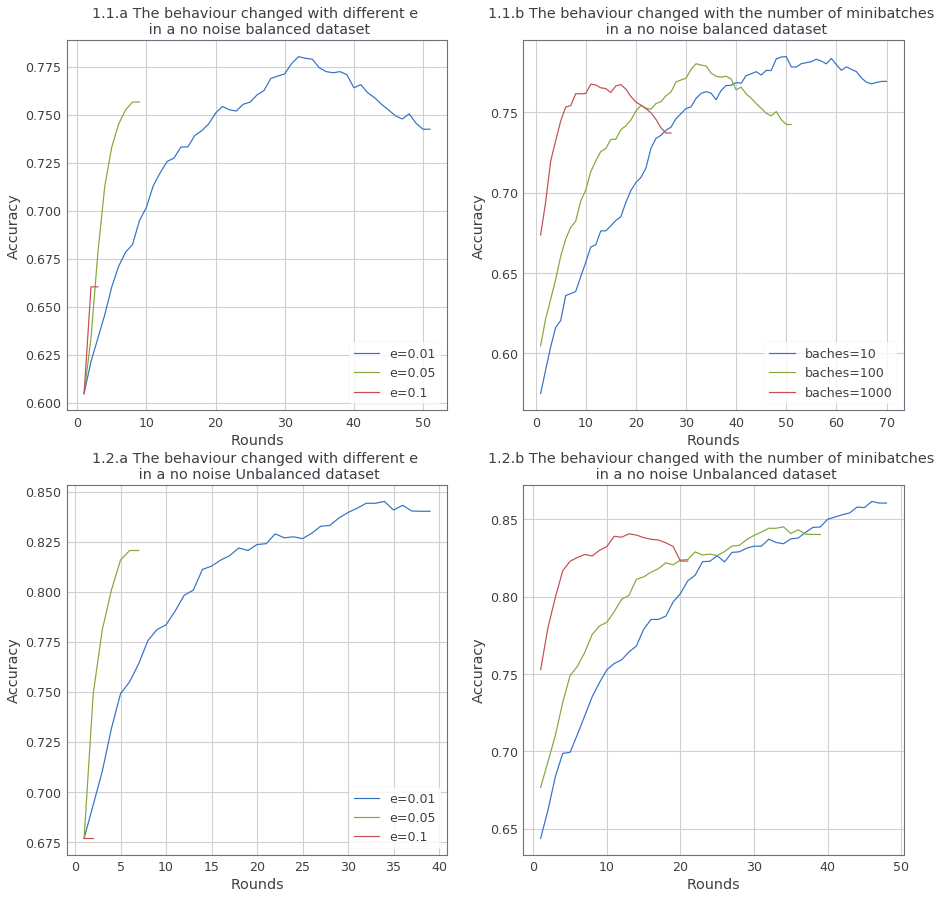

In [11]:
#1.1.a balanced acc-rounds /e (multiple lines one for each e)
figure(figsize=(15,15)) 
plt.subplot(221)
plt.plot(Bal_rounds_e[0], Bal_acc_e[0],label="e=0.01")
plt.plot(Bal_rounds_e[1], Bal_acc_e[1],label="e=0.05")
plt.plot(Bal_rounds_e[2], Bal_acc_e[2],label="e=0.1")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title('1.1.a The behaviour changed with different e \n in a no noise balanced dataset')
plt.legend();

plt.subplot(222)
plt.plot(Bal_rounds_b[0], Bal_acc_b[0],label="baches=10")
plt.plot(Bal_rounds_b[1], Bal_acc_b[1],label="baches=100")
plt.plot(Bal_rounds_b[2], Bal_acc_b[2],label="baches=1000")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title('1.1.b The behaviour changed with the number of minibatches \n in a no noise balanced dataset')
plt.legend();

#1.2.a unbalanced acc-rounds (multiple lines one for each e)
plt.subplot(223)
plt.plot(UnBal_rounds_e[0], UnBal_acc_e[0],label="e=0.01")
plt.plot(UnBal_rounds_e[1], UnBal_acc_e[1],label="e=0.05")
plt.plot(UnBal_rounds_e[2], UnBal_acc_e[2],label="e=0.1")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title('1.2.a The behaviour changed with different e \n in a no noise Unbalanced dataset')
plt.legend();

#1.2.b unbalanced acc-rounds /baches (multiple lines)
plt.subplot(224)
plt.plot(UnBal_rounds_b[0], UnBal_acc_b[0],label="baches=10")
plt.plot(UnBal_rounds_b[1], UnBal_acc_b[1],label="baches=100")
plt.plot(UnBal_rounds_b[2], UnBal_acc_b[2],label="baches=1000")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title('1.2.b The behaviour changed with the number of minibatches \n in a no noise Unbalanced dataset')
plt.show();

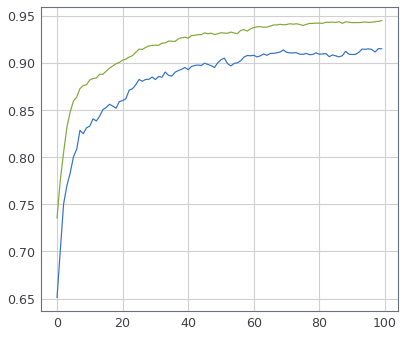

In [12]:
plt.plot(len_real1,Acc_real1,label="real")
plt.plot(len_real2,Acc_real2,label="real")
plt.show();

In [ ]:
new="yes"
e=0.1
E_array,feature_array,Acc,Rounds,Subs=main(client,w,new,dataset_params,100,e)